In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
from matplotlib.lines import Line2D
from IPython.display import Image
#check version pandas

# Seaborn is a cool library to use whenever starting data exploration


import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=23)


plt.rc('xtick', color='k', labelsize='medium', direction='in')
plt.rc('xtick.major', size=8, pad=12)
plt.rc('xtick.minor', size=8, pad=12)

plt.rc('ytick', color='k', labelsize='medium', direction='in')
plt.rc('ytick.major', size=8, pad=12)
plt.rc('ytick.minor', size=8, pad=12)

# Data exploration
## Table Of Content:
* [**Data prepartion for ML**](#first-bullet)
    * [First look at the data](#FL-bullet)
    * [Value transformation and variance stabilization](#TR-bullet)
    * [Missing Values](#MV-bullet)
    * [Checking Types](#TY-bullet)
    * [OneHot Encoding](#OH-bullet)

* [**Dimensionality reduction/Embedding**](#fourth-bullet)
    * [Principal component analysis](#PCA-bullet)
    * [PCA for immunogenicity dataset](#PCAi-bullet)
    * [Independant component analysis](#ICA-bullet)
    * [t-SNE](#tsne-bullet)     

* [**Clustering methods**](#fifth-bullet)
    * [K-means](#Kmeans-bullet)
    * [Hierarchichal clustering](#HC-bullet)
    * [DBSCAN](#DBSCAN-bullet)
       
* [**Appendix**](#appendix-bullet)
    * [Whitening](#whiten-bullet)
    * [UMAP](#umap-bullet)
    * [Gaussian mixtures](#gm-bullet)
    * [PCA for breast cancer data](#bc-bullet)
    * [PCA for Iris data](#iris-bullet)
    * [Looking at sklearn code](#code-bullet)
    
* [**Exo**](#exo-bullet)

# Data prepartion for ML <a class="anchor" id="first-bullet"></a>

### First look at the data <a class="anchor" id="FL-bullet"></a>

In this intoduction we are using a yeast Phospho proteomics dataset [Plank et al. MCP, 2020](https://doi.org/10.1074/mcp.RA120.001955). The study performed a LC-MS/MS experiment and label-free quantitation to study the effect of AGC-kinase (Sch9, Pka1, Ypk1) inhibition on the phosphoproteome. 5 yeast strains were used: WT, and Sch9, Pka1, Sch9&Pka1, Ypk1 mutant strains. Sch9, Pka1, Ypk1 were mutated in order to allow the 1NMPP1 molecule to bind to the mutant and inhibit its active site. DMSO was used as a control. All measurements were performed in 3 technical replicates.

In [2]:
df_ph = pd.read_excel('../data/Phospho_TOR_inhib.xls', sheet_name='Phospho_TOR_inhib',header=0)
df_ph.head()

Peptide sequence Phosphosites Standard name       WT_DMSO  \
0        ADDEEDLS(Phospho)DENIQPELR         S720          ABF1  1.291531e+08   
1       NVVDENLINDMDS(Phospho)EDAHK         S618          ABF1  0.000000e+00   
2                 SNS(Phospho)IDYAK         S467          ABF1  9.528159e+06   
3                  AST(Phospho)PPVK         T157          ABP1  0.000000e+00   
4  KEPVKT(Phospho)PS(Phospho)PAPAAK    T181 S183          ABP1  1.794915e+07   

      WT_DMSO.1     WT_DMSO.2     WT_1NMPP1   WT_1NMPP1.1   WT_1NMPP1.2  \
0  1.378099e+08  1.264078e+08  1.093194e+08  1.207158e+08  1.143397e+08   
1  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2  9.008914e+06  8.909709e+06  9.653322e+06  8.720282e+06  9.312677e+06   
3  0.000000e+00  0.000000e+00  6.426355e+05  5.563823e+05  7.040516e+05   
4  1.813076e+07  1.651690e+07  1.630399e+07  1.657684e+07  1.456594e+06   

      Sch9_DMSO  ...  Sch9_Pka1_DMSO.2  Sch9_Pka1_1NMPP1  Sch9_Pka1_1NMPP1.1  \
0  1.178994e+08  ...      1.292352e+08      1.150856e+08        1.289056e+08   
1  0.000000e+00  ...      0.000000e+00      0.000000e+00        8.857596e+06   
2  1.167629e+07  ...      8.144665e+06      1.424212e+07        1.518253e+07   
3  0.000000e+00  ...      0.000000e+00      0.000000e+00        0.000000e+00   
4  0.000000e+00  ...      0.000000e+00      1.015874e+08        8.166463e+07   

   Sch9_Pka1_1NMPP1.2     Ypk1_DMSO   Ypk1_DMSO.1   Ypk1_DMSO.2   Ypk1_1NMPP1  \
0        1.246350e+08  1.027790e+08  9.492511e+07  9.892962e+07  9.760830e+07   
1        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2        1.120638e+07  4.292957e+06  4.453389e+06  5.198223e+06  4.205676e+06   
3        0.000000e+00  0.000000e+00  0.000000e+00  5.659378e+05  1.221233e+06   
4        8.378514e+07  0.000000e+00  0.000000e+00  4.784055e+07  5.243548e+07   

   Ypk1_1NMPP1.1  Ypk1_1NMPP1.2  
0   1.005682e+08   1.023071e+08  
1   0.000000e+00   0.000000e+00  
2   4.287624e+06   6.059179e+06  
3   0.000000e+00   0.000000e+00  
4   5.166661e+07   6.010725e+07  

[5 rows x 33 columns]

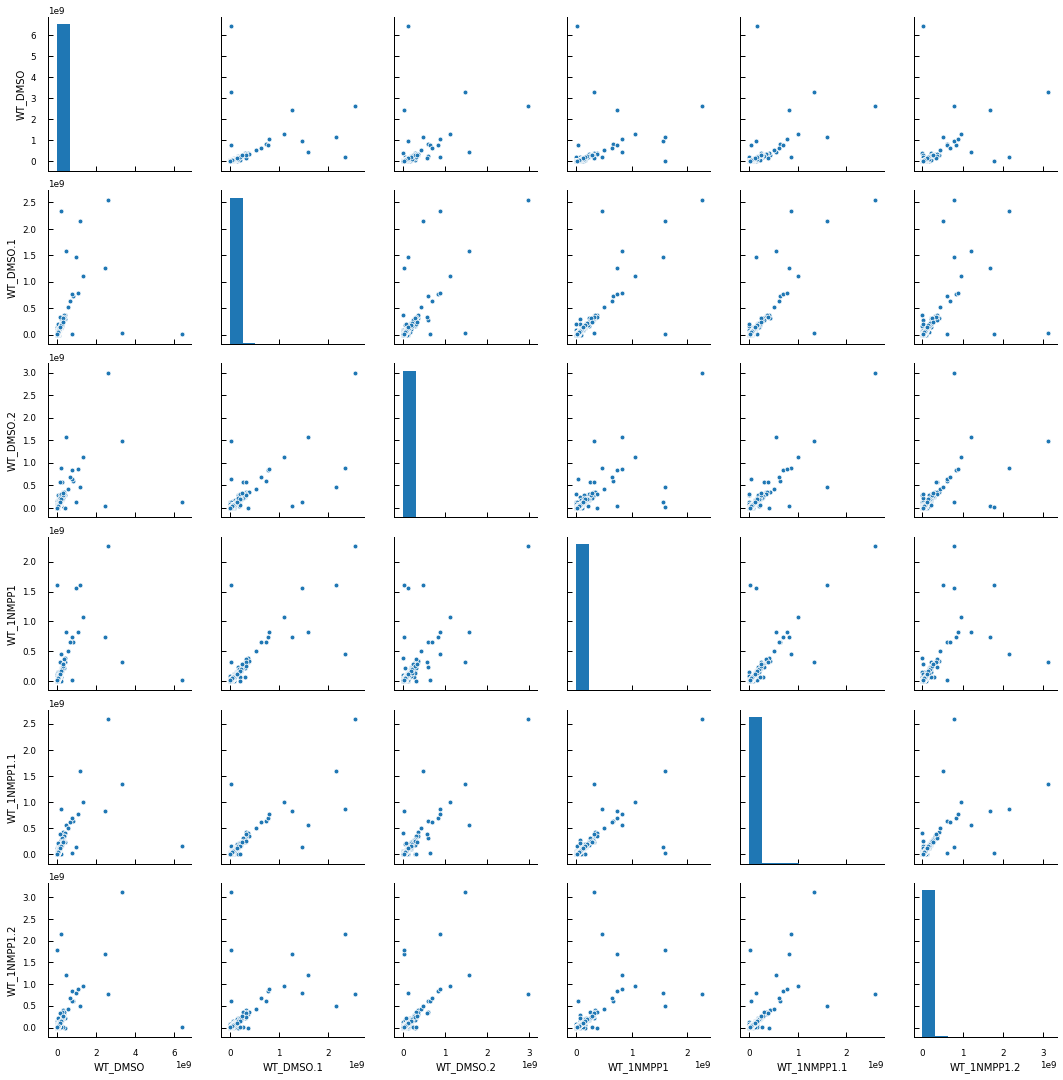

In [3]:
X_ph = df_ph.iloc[:,3:]
sns.set_context("paper", rc={"axes.labelsize":10})
sns.pairplot(X_ph.iloc[:,0:6])

### Value transformation and variance stabilization <a class="anchor" id="TR-bullet"></a>

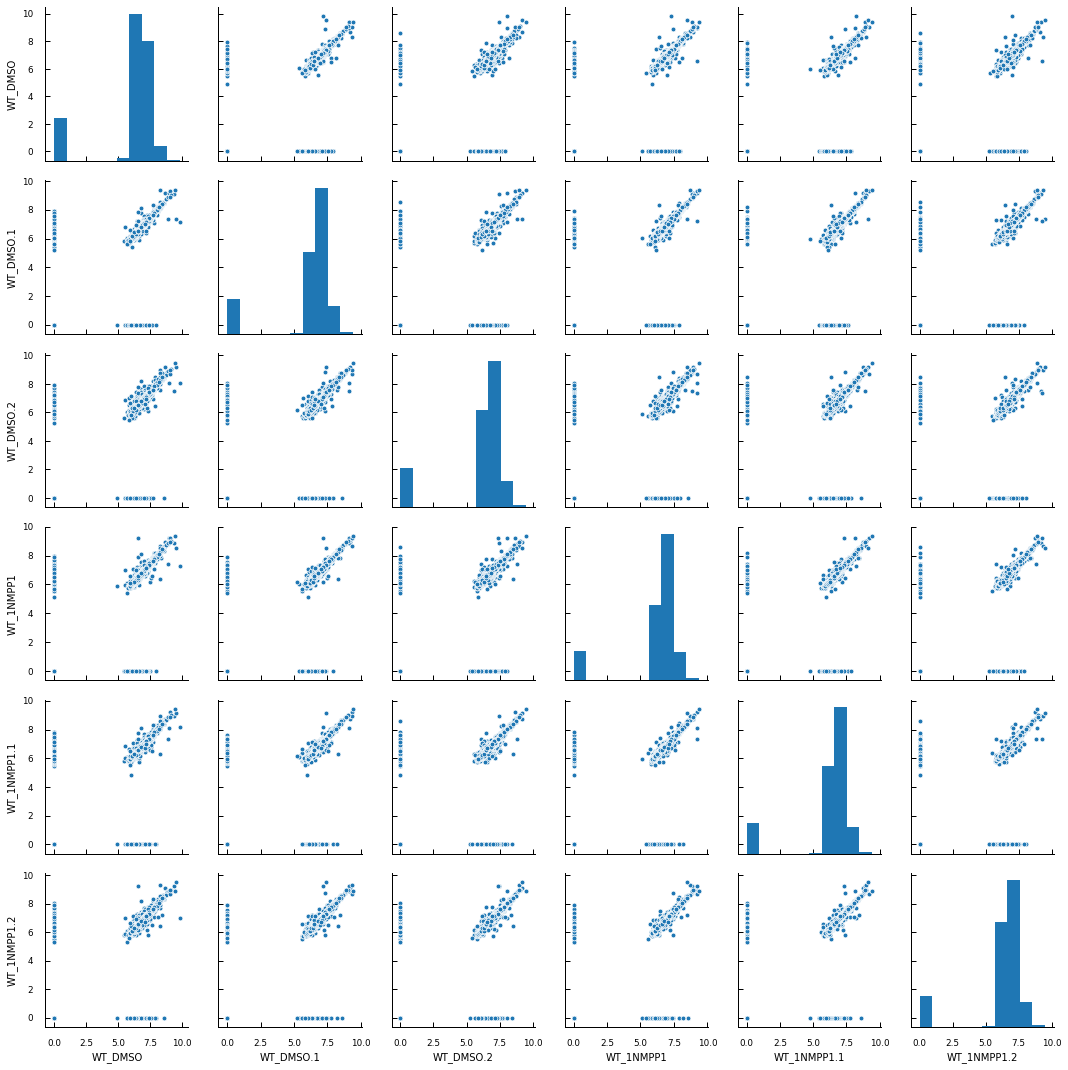

In [4]:
X_ph = X_ph.transform(lambda x: np.log10(x + 1))
sns.set_context("paper", rc={"axes.labelsize":10})
sns.pairplot(X_ph.iloc[:,0:6])

### Missing Values <a class="anchor" id="MV-bullet"></a>

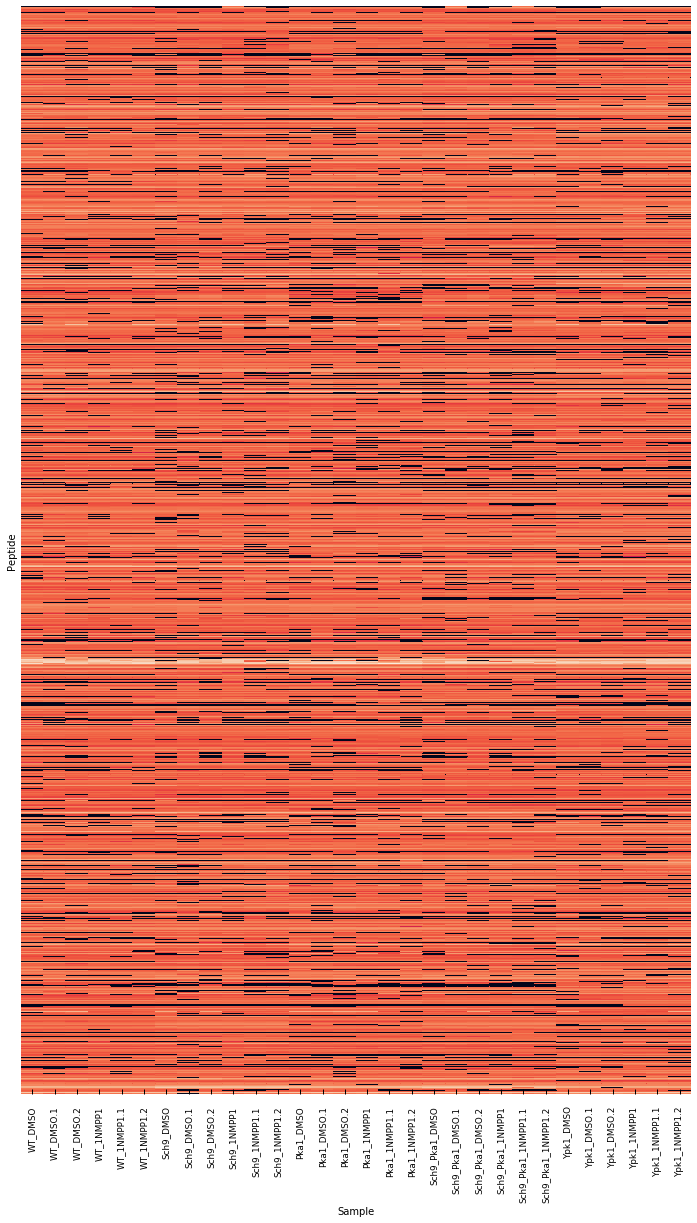

In [5]:
plt.figure(figsize=(12,20))
#X_ph.set_index(df_ph['Peptide sequence'], inplace=True)
ax = sns.heatmap(X_ph, cbar=False,yticklabels=False)
plt.xlabel("Sample")
plt.ylabel("Peptide")
plt.show()

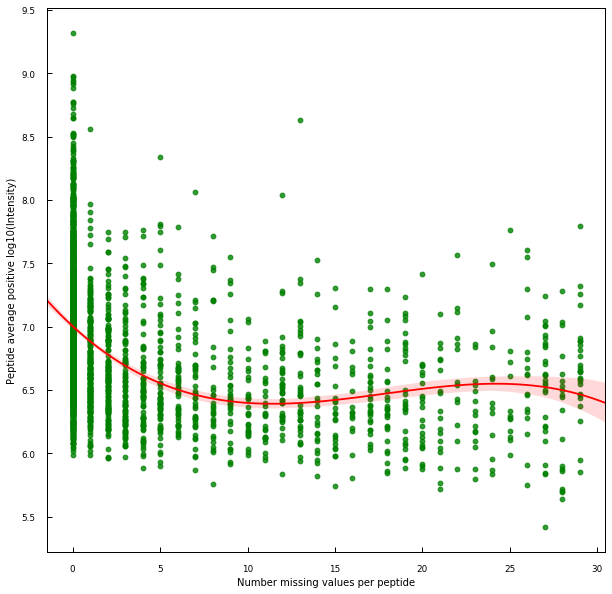

In [6]:
avg = X_ph[X_ph>0].mean(axis=1)
nr_missing = (X_ph==0).sum(axis=1)

plt.figure(figsize=(10,10))
sns.regplot(x=nr_missing, y=avg, order=3, color="g",line_kws={'color':"red"})
plt.ylabel('Peptide average positive log10(Intensity)')
plt.xlabel('Number missing values per peptide')
plt.show(block=False)

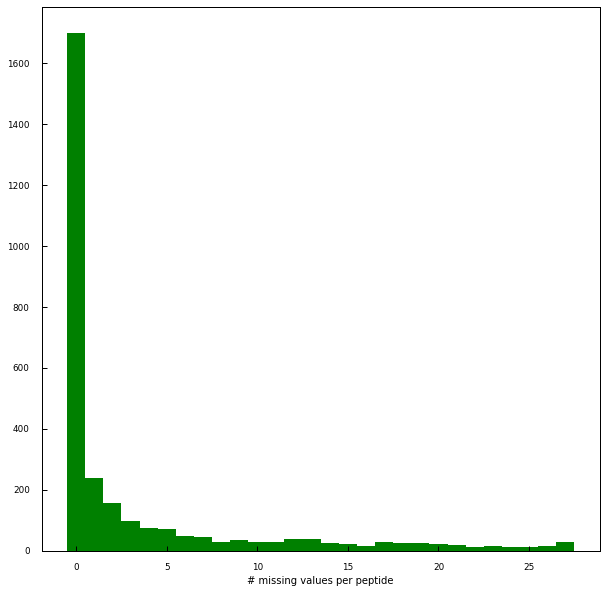

In [7]:
nr_missing = (X_ph==0).sum(axis=1)
plt.figure(figsize=(10,10))
plt.hist(nr_missing, color="g",bins=np.arange(0,29)-0.5)
plt.xlabel("# missing values per peptide")
plt.show()

They are many ways to deal with missing values. The simplest strategies are just to remove all peptides that contain a missing value or to impute a mean positive value for all zero values.

Most of the peptides have zero missing values and discarding all peptides with missing values is not an optimal, but feasible strategy for these data. 

In [8]:
X_ph_positive = X_ph[(X_ph>0).all(axis=1)]
X_ph_positive.head()

WT_DMSO  WT_DMSO.1  WT_DMSO.2  \
Peptide sequence                                                            
ADDEEDLS(Phospho)DENIQPELR                 8.111105   8.139281   8.101774   
SNS(Phospho)IDYAK                          6.979009   6.954673   6.949864   
KEPVKTPS(Phospho)PAPAAK                    7.376958   7.277585   7.236313   
NEKS(Phospho)PAQLWAER                      6.157649   6.020137   6.151031   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK  7.088574   7.040337   7.016449   

                                           WT_1NMPP1  WT_1NMPP1.1  \
Peptide sequence                                                    
ADDEEDLS(Phospho)DENIQPELR                  8.038697     8.081764   
SNS(Phospho)IDYAK                           6.984677     6.940531   
KEPVKTPS(Phospho)PAPAAK                     7.379282     7.286498   
NEKS(Phospho)PAQLWAER                       6.146390     6.070549   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK   7.006731     6.976935   

                                           WT_1NMPP1.2  Sch9_DMSO  \
Peptide sequence                                                    
ADDEEDLS(Phospho)DENIQPELR                    8.058197   8.071512   
SNS(Phospho)IDYAK                             6.969075   7.067305   
KEPVKTPS(Phospho)PAPAAK                       7.263972   7.633745   
NEKS(Phospho)PAQLWAER                         6.110564   6.381188   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     6.977722   7.017229   

                                           Sch9_DMSO.1  Sch9_DMSO.2  \
Peptide sequence                                                      
ADDEEDLS(Phospho)DENIQPELR                    8.165305     8.080783   
SNS(Phospho)IDYAK                             7.071589     6.999701   
KEPVKTPS(Phospho)PAPAAK                       7.687869     7.546505   
NEKS(Phospho)PAQLWAER                         6.332733     6.460504   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     7.010478     6.982010   

                                           Sch9_1NMPP1  ...  Sch9_Pka1_DMSO.2  \
Peptide sequence                                        ...                     
ADDEEDLS(Phospho)DENIQPELR                    8.132232  ...          8.111381   
SNS(Phospho)IDYAK                             7.135595  ...          6.910873   
KEPVKTPS(Phospho)PAPAAK                       7.629455  ...          7.593738   
NEKS(Phospho)PAQLWAER                         6.445138  ...          6.588172   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     6.957545  ...          6.973805   

                                           Sch9_Pka1_1NMPP1  \
Peptide sequence                                              
ADDEEDLS(Phospho)DENIQPELR                         8.061021   
SNS(Phospho)IDYAK                                  7.153575   
KEPVKTPS(Phospho)PAPAAK                            7.760404   
NEKS(Phospho)PAQLWAER                              6.748983   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK          6.966654   

                                           Sch9_Pka1_1NMPP1.1  \
Peptide sequence                                                
ADDEEDLS(Phospho)DENIQPELR                           8.110272   
SNS(Phospho)IDYAK                                    7.181344   
KEPVKTPS(Phospho)PAPAAK                              7.759729   
NEKS(Phospho)PAQLWAER                                6.737448   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK            6.968440   

                                           Sch9_Pka1_1NMPP1.2  Ypk1_DMSO  \
Peptide sequence                                                           
ADDEEDLS(Phospho)DENIQPELR                           8.095640   8.011904   
SNS(Phospho)IDYAK                                    7.049465   6.632757   
KEPVKTPS(Phospho)PAPAAK                              7.696079   7.463205   
NEKS(Phospho)PAQLWAER                                6.666609   6.304341   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK            6.959224   7.071196   

                                       

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
X_ph_imputed = pd.DataFrame(imputer.fit_transform(X_ph.T).T, columns=X_ph.columns, index=X_ph.index)

X_ph_imputed.head()

WT_DMSO  WT_DMSO.1  WT_DMSO.2  WT_1NMPP1  \
Peptide sequence                                                              
ADDEEDLS(Phospho)DENIQPELR        8.111105   8.139281   8.101774   8.038697   
NVVDENLINDMDS(Phospho)EDAHK       6.908059   6.908059   6.908059   6.908059   
SNS(Phospho)IDYAK                 6.979009   6.954673   6.949864   6.984677   
AST(Phospho)PPVK                  6.033875   6.033875   6.033875   5.807965   
KEPVKT(Phospho)PS(Phospho)PAPAAK  7.254044   7.258416   7.217928   7.212294   

                                  WT_1NMPP1.1  WT_1NMPP1.2  Sch9_DMSO  \
Peptide sequence                                                        
ADDEEDLS(Phospho)DENIQPELR           8.081764     8.058197   8.071512   
NVVDENLINDMDS(Phospho)EDAHK          6.908059     6.908059   6.908059   
SNS(Phospho)IDYAK                    6.940531     6.969075   7.067305   
AST(Phospho)PPVK                     5.745374     5.847605   6.033875   
KEPVKT(Phospho)PS(Phospho)PAPAAK     7.219502     6.163339   7.449571   

                                  Sch9_DMSO.1  Sch9_DMSO.2  Sch9_1NMPP1  ...  \
Peptide sequence                                                         ...   
ADDEEDLS(Phospho)DENIQPELR           8.165305     8.080783     8.132232  ...   
NVVDENLINDMDS(Phospho)EDAHK          6.908059     6.908059     6.888168  ...   
SNS(Phospho)IDYAK                    7.071589     6.999701     7.135595  ...   
AST(Phospho)PPVK                     6.212480     6.184184     6.172707  ...   
KEPVKT(Phospho)PS(Phospho)PAPAAK     7.449571     7.449571     7.902286  ...   

                                  Sch9_Pka1_DMSO.2  Sch9_Pka1_1NMPP1  \
Peptide sequence                                                       
ADDEEDLS(Phospho)DENIQPELR                8.111381          8.061021   
NVVDENLINDMDS(Phospho)EDAHK               6.908059          6.908059   
SNS(Phospho)IDYAK                         6.910873          7.153575   
AST(Phospho)PPVK                          6.033875          6.033875   
KEPVKT(Phospho)PS(Phospho)PAPAAK          7.449571          8.006840   

                                  Sch9_Pka1_1NMPP1.1  Sch9_Pka1_1NMPP1.2  \
Peptide sequence                                                           
ADDEEDLS(Phospho)DENIQPELR                  8.110272            8.095640   
NVVDENLINDMDS(Phospho)EDAHK                 6.947316            6.908059   
SNS(Phospho)IDYAK                           7.181344            7.049465   
AST(Phospho)PPVK                            6.033875            6.033875   
KEPVKT(Phospho)PS(Phospho)PAPAAK            7.912034            7.923167   

                                  Ypk1_DMSO  Ypk1_DMSO.1  Ypk1_DMSO.2  \
Peptide sequence                                                        
ADDEEDLS(Phospho)DENIQPELR         8.011904     7.977381     7.995326   
NVVDENLINDMDS(Phospho)EDAHK        6.908059     6.908059     6.908059   
SNS(Phospho)IDYAK                  6.632757     6.648691     6.715855   
AST(Phospho)PPVK                   6.033875     6.033875     5.752769   
KEPVKT(Phospho)PS(Phospho)PAPAAK   7.449571     7.449571     7.679796   

                                  Ypk1_1NMPP1  Ypk1_1NMPP1.1  Ypk1_1NMPP1.2  
Peptide sequence                                                             
ADDEEDLS(Phospho)DENIQPELR           7.989487       8.002461       8.009906  
NVVDENLINDMDS(Phospho)EDAHK          6.908059       6.908059       6.908059  
SNS(Phospho)IDYAK                    6.623836       6.632217       6.782414  
AST(Phospho)PPVK                     6.086799       6.033875       6.033875  
KEPVKT(Phospho)PS(Phospho)PAPAAK     7.719625       7.713210       7.778927  

[5 rows x 30 columns]

In [ ]:
Next we would like to have a look at the correlation between treatments:

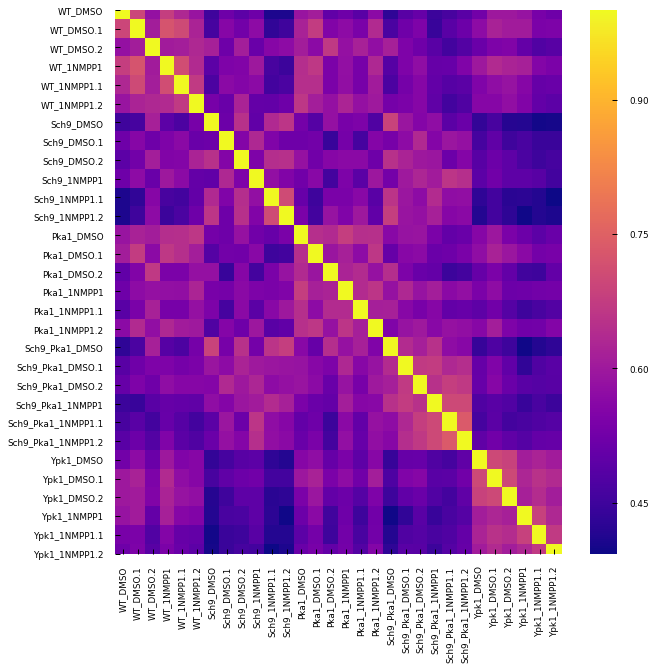

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(X_ph.corr(),cmap='plasma')
plt.show()

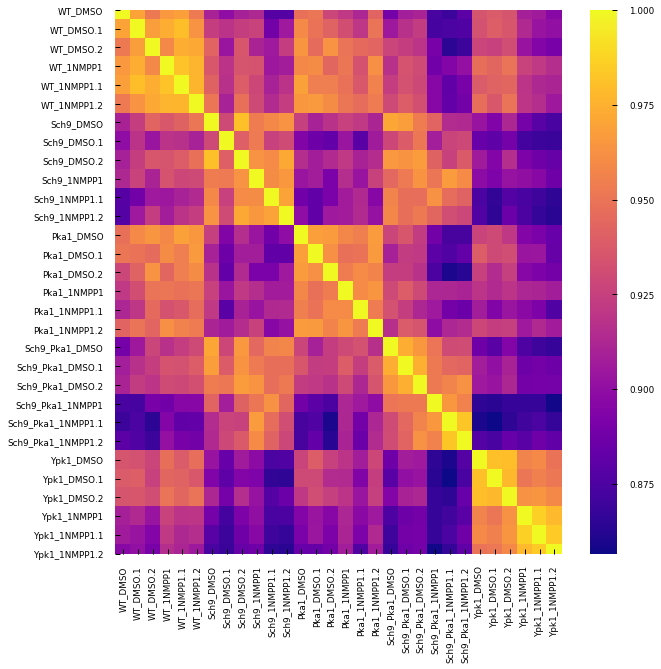

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(X_ph_positive.corr(),cmap='plasma')
plt.show()

### Making sure columns are the right type <a class="anchor" id="TY-bullet"></a>

In [41]:
df_ph.dtypes

Peptide sequence       object
Phosphosites           object
Standard name          object
WT_DMSO               float64
WT_DMSO.1             float64
WT_DMSO.2             float64
WT_1NMPP1             float64
WT_1NMPP1.1           float64
WT_1NMPP1.2           float64
Sch9_DMSO             float64
Sch9_DMSO.1           float64
Sch9_DMSO.2           float64
Sch9_1NMPP1           float64
Sch9_1NMPP1.1         float64
Sch9_1NMPP1.2         float64
Pka1_DMSO             float64
Pka1_DMSO.1           float64
Pka1_DMSO.2           float64
Pka1_1NMPP1           float64
Pka1_1NMPP1.1         float64
Pka1_1NMPP1.2         float64
Sch9_Pka1_DMSO        float64
Sch9_Pka1_DMSO.1      float64
Sch9_Pka1_DMSO.2      float64
Sch9_Pka1_1NMPP1      float64
Sch9_Pka1_1NMPP1.1    float64
Sch9_Pka1_1NMPP1.2    float64
Ypk1_DMSO             float64
Ypk1_DMSO.1           float64
Ypk1_DMSO.2           float64
Ypk1_1NMPP1           float64
Ypk1_1NMPP1.1         float64
Ypk1_1NMPP1.2         float64
dtype: obj

In [42]:
df_ph["WT_DMSO"] = df_ph["WT_DMSO"].astype('float64')

### One hot encoding of categorical data <a class="anchor" id="OH-bullet"></a>

In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
cat = df_ph[['Standard name']]
ohe = pd.DataFrame(enc.fit_transform(cat).toarray())

ohe.head()

0     1     2     3     4     5     6     7     8     9     ...  1138  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1139  1140  1141  1142  1143  1144  1145  1146  1147  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1148 columns]

# Enough with data processing let's start some real science

## Dimensionality reduction <a class="anchor" id="fourth-bullet"></a>

Dimensionality reduction serves two puposes
<ol>
<li><b>Visualization</b>: reducing the number of dimensions to 2 or 3 allows displaying the whole dataset for visual inspection</li>
<li><b>Data compression</b>: some features may be little informative and projecting feature vectors to the principal data manifold allows discarding the uninformative part of the feature space</li>
</ol> 

### Principal Component Analysis (PCA) <a class="anchor" id="PCA-bullet"></a>

As described in the lecture notes, PCA finds the direction in feature space with the largest variance (first principal component), meaning the direction where the data points are most spread out. Then it repeats the same algorithm to find the direction orthogonal to the first principal component (second principal component) with the largest (remaining) variance. The second principal component can only give information about the variance not explained by the first component. Mathematically this boils down to the eigenvalue decomposition or diagonalization of the covariance matrix, where the eigenvalue is the variance of the data along its eigenvector (principal component).

In PCA are looking for the matrix of eigenvalues $\pmb{D}$ and orthogonal basis vectors (eigenvectors) $\pmb{W}$, that satisfies the following relation:

$\pmb{X}^T\pmb{X}=\pmb{W}\pmb{D}\pmb{W}^T$

$\pmb{X}$ must be centered around the mean value of each feature vector (each column in the dataframe has zero empirical mean), so that $\pmb{Q}=\pmb{X}^T\pmb{X}$ is the covariance matrix of your multidimensional data (zero centering is done by the PCA algorithm, so no need to do it yourself).

Note: algorithms that perfom PCA generally use Singular Value Decomposition (SVD). 

The output of such a process is a set of eigenvectors or PCs (which are a linear combination of your former features) and the variance corresponding to each eigenvector (eigenvalues). The eigenvalues are in decreasiung order to give us their decreasing signficance to explain the overall variance. The Scikit-learn [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) has, as other scikit classes, two main methods: fit() and transform(). For a data matrix $\pmb{X}$ of size NxM (N data rows, M feature colums) the fit($\pmb{X}$) calculates $\pmb{W}$ (with the M PCs as columns) of $\pmb{X}$ and the transform($\pmb{X}$) method provides the coordinates of the N data vectors in the eigenvector or principal component space by calculating $\pmb{X'}=\pmb{X}\pmb{W}$ (in case of 'whiten'=False).

PCA analysis has a clear mathematical framework and is fast to calculate (compared to t-SNE, for example). It can be easily applied to distributed data and is therefore also attractive for very large datasets. It also serves as a preprocessing step to de-correlate or 'whiten' a data matrix (see Appendix).

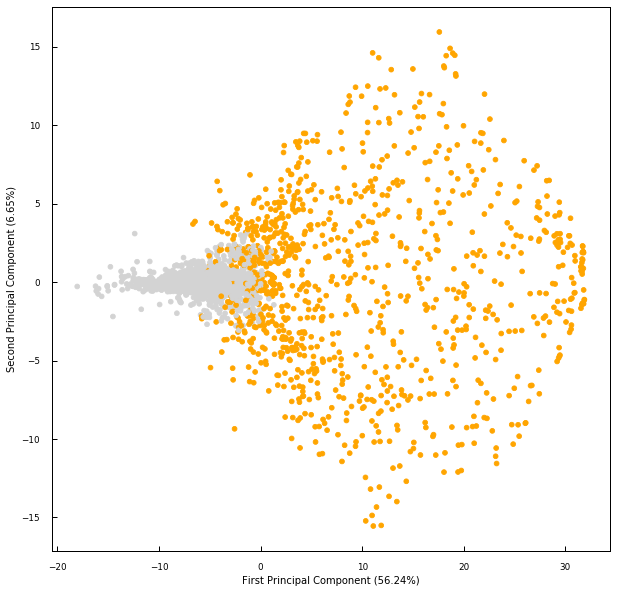

In [13]:
from sklearn.decomposition import PCA
pca = PCA() #create an empty PCA object

pca.fit(X_ph) # calcultes variances (eigenvalues)) and principal components (eigenvectors)

x_pca = pca.transform(X_ph) # calculates coordinates of row vectors in X in PC space

mv_color=["lightgray" if mv_cnt<2 else "orange" for mv_cnt in nr_missing]

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=mv_color)
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

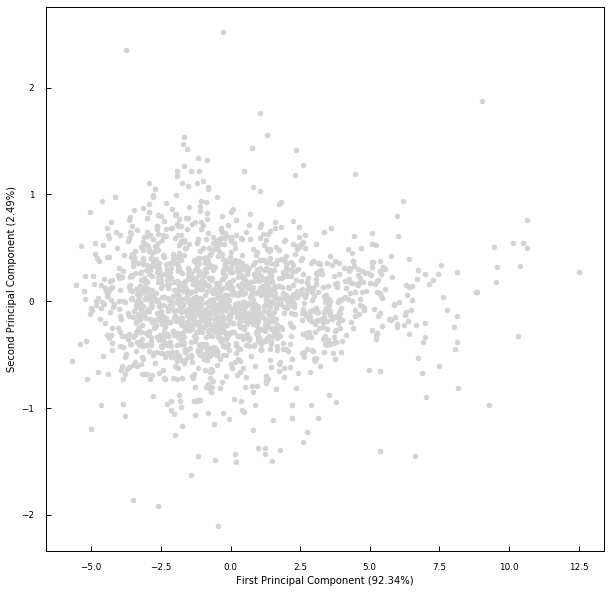

In [14]:
pca = PCA() #create an empty PCA object

pca.fit(X_ph_positive) # calcultes variances (eigenvalues)) and principal components (eigenvectors)

x_pca = pca.transform(X_ph_positive) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

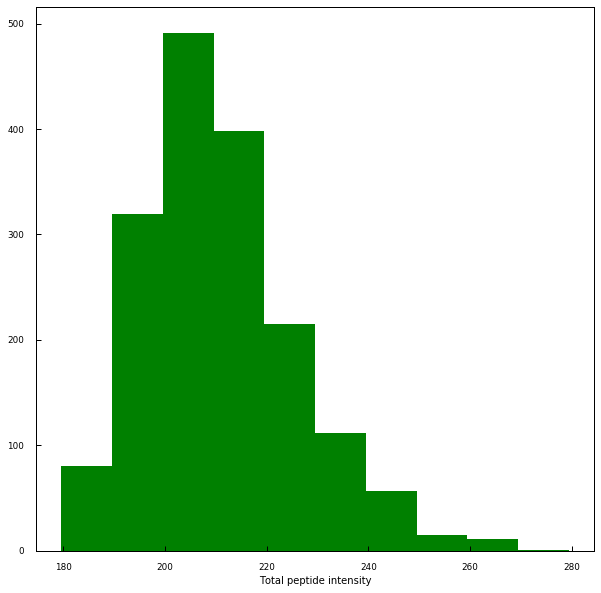

In [15]:
pept_intens = X_ph_positive.sum(axis=1)
plt.figure(figsize=(10,10))
plt.hist(pept_intens, color="g")
plt.xlabel("Total peptide intensity")
plt.show()

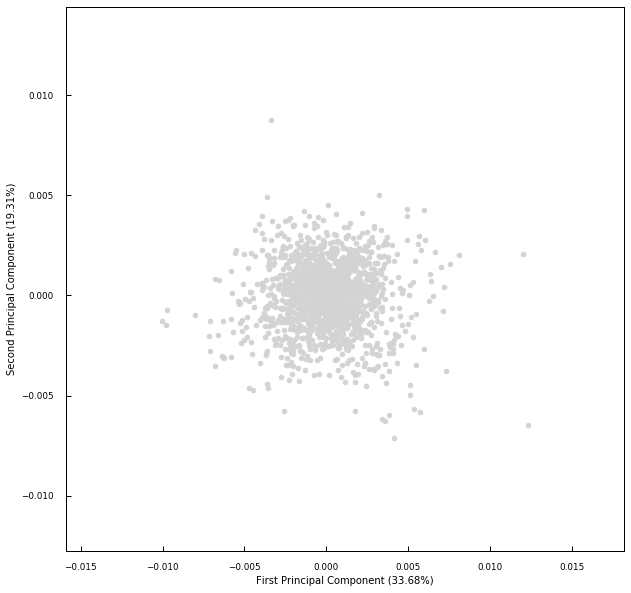

In [16]:
pca = PCA() #create an empty PCA object

X_ph_norm = X_ph_positive.div(pept_intens, axis=0)

pca.fit(X_ph_norm) # calcultes variances (eigenvalues)) and principal components (eigenvectors)
x_pca = pca.transform(X_ph_norm) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

We see that the variance along the first PC is now reduced to 34%. Now the PCA plot does not tell us much about the data. We can get more information by plotting the directions that correspond to the individual treatments. We can get the treatment directions via pca.components_, which is our MxM matrix $\pmb{W}^T$ (M = number of columns, features or treatments) where each row holds the PC coordinates in feature space and each column the treatment coordinates in PC space. The rows of pca.components_ are ordered by decreasing variance. 

The visualization of this matrix also reveals that the componenents of first 5 PC show good aggreement between replicates, and afterwards the PC componenents become noisy.

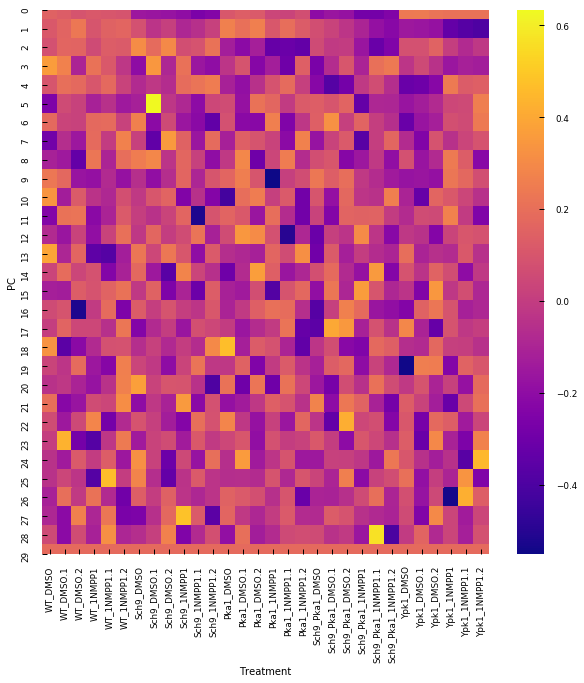

In [17]:
df_comp = pd.DataFrame(pca.components_,columns=X_ph.columns)
plt.figure(figsize=(10,10))
sns.heatmap(df_comp,cmap='plasma')
plt.xlabel("Treatment")
plt.ylabel("PC")
plt.show()

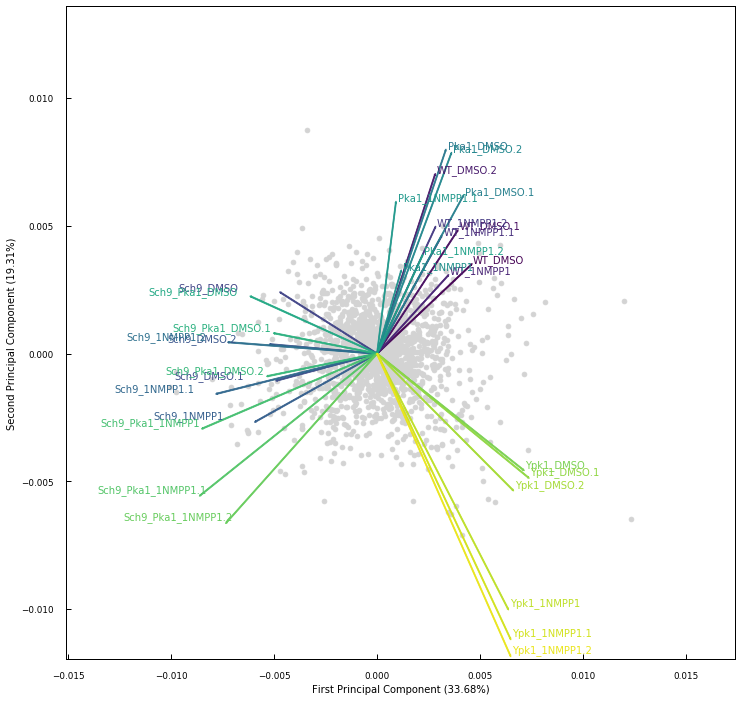

In [18]:
plt.figure(figsize=(12,12))
plt.scatter(x_pca[:,0],x_pca[:,1],c='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))

feature_vectors = pca.components_.T
arrow_size = 0.03

# projections of the original features
cmap = cm.get_cmap('viridis')
n = feature_vectors.shape[0]
for i, v in enumerate(feature_vectors): # enumerate over the rows of feature_vectors
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], head_width=0.00008, head_length=0.00008, width=0.00005,
              color=cmap((1.0 * i) / n))
    text_pos = -0.005 if v[0] < 0 else 0.0001
    plt.text(v[0]*arrow_size+text_pos, v[1]*arrow_size+0.0001, X_ph.columns[i], 
            color=cmap((1.0 * i) / n),fontsize=10)
    

plt.show()


### PCA on the immunogenicity dataset <a class="anchor" id="PCAi-bullet"></a>

The second dataset we would like to use is taken from a publication by [Stronen et al., Science, 2016](https://science.sciencemag.org/content/352/6291/1337) in the field of cancer immunology. It measured the immunogenic potential of peptides carrying somatic mutations by testing whether they induce a CD8+ T cell response in a healthy donor. There are 3 different outcomes of the "CD8+ T cell response induced in healthy donor: Tested/Observed” feature: 11 positive (YES/YES), 46 negative (YES/NO), 977 unclear (NA). The table gives various predictors of immunogenicity such as predicted HLA binding affinity for WT and mutant peptides, predicted HLA binding stability, predicted proteome cleavage compatibility, RNA-seq expression of the mutated gene, RNA-seq read coverage of the mutation.

In [20]:
df_im = pd.read_csv('../data/aaf2288-Table-S8.csv',header=0)

CD8_info = df_im["CD8+ T cell response induced in healthy donor: Tested/Observed"]
response = np.full(df_im.shape[0],"na")
response[CD8_info.notna() & CD8_info.str.contains("YES /")] = "ne"
response[CD8_info.notna() & CD8_info.str.contains("/ YES")] = "po"

df_im.loc[response=="po",'Mutant peptide'] = df_im.loc[response=="po",'Mutant peptide']+"*"

# select the numerical features
X_im = df_im[["Position of mutation in peptide","Predicted affinity wildtype peptide (nM)",
              "Predicted affinity mutant peptide (nM)","Predicted cleavage probability wildtype peptide",
              "Predicted cleavage probability mutant peptide","Predicted stability wildtype peptide (hours)",
              "Predicted stability mutant peptide (hours)","% of mutant reads","RNA expression of gene (FPKM)"]]

d = {"Position of mutation in peptide":"MUT_pos",
     "Predicted affinity wildtype peptide (nM)":"WT_affin",
     "Predicted affinity mutant peptide (nM)":"MUT_affin",
     "Predicted cleavage probability wildtype peptide":"WT_cleav",
     "Predicted cleavage probability mutant peptide":"MUT_cleav",
     "Predicted stability wildtype peptide (hours)":"WT_stability",
     "Predicted stability mutant peptide (hours)":"MUT_stability",
     "% of mutant reads":"WT_read_perc",
     "RNA expression of gene (FPKM)":"RNA_expr"}

X_im = X_im.rename(columns = d, inplace = False) # rename the columns
# some features have highly skewed distributions and its better to normalize them by a log-transform
X_im['RNA_expr'] = np.log10(X_im['RNA_expr'])
X_im['WT_affin'] = np.log10(X_im['WT_affin'])
X_im['MUT_affin'] = np.log10(X_im['MUT_affin'])

# select the numerical features

X_im = X_im.set_index(df_im['Mutant peptide'], inplace=False)

X_im_num = X_im.copy()
X_im['Response'] = response

X_im.head()


MUT_pos  WT_affin  MUT_affin  WT_cleav  MUT_cleav  \
Mutant peptide                                                      
STAFDFLAV             4  2.176091   2.559907      0.84       0.89   
SQSPSSFSM             9  3.561936   2.921686      0.74       0.97   
KIQANALPL             4  2.376577   2.770115      0.97       0.95   
YASSYIILA             6  1.934498   1.698970      0.19       0.54   
FALGNVISA             1  3.525304   2.376577      0.87       0.76   

                WT_stability  MUT_stability  WT_read_perc  RNA_expr Response  
Mutant peptide                                                                
STAFDFLAV              0.433          0.407          47.6  5.503815       ne  
SQSPSSFSM              0.468          0.540          16.9  3.124964       na  
KIQANALPL              0.667          0.559          10.1  1.042831       na  
YASSYIILA              0.564          0.689          64.0  4.849064       na  
FALGNVISA              0.459          0.697          50.8  5.674780       ne

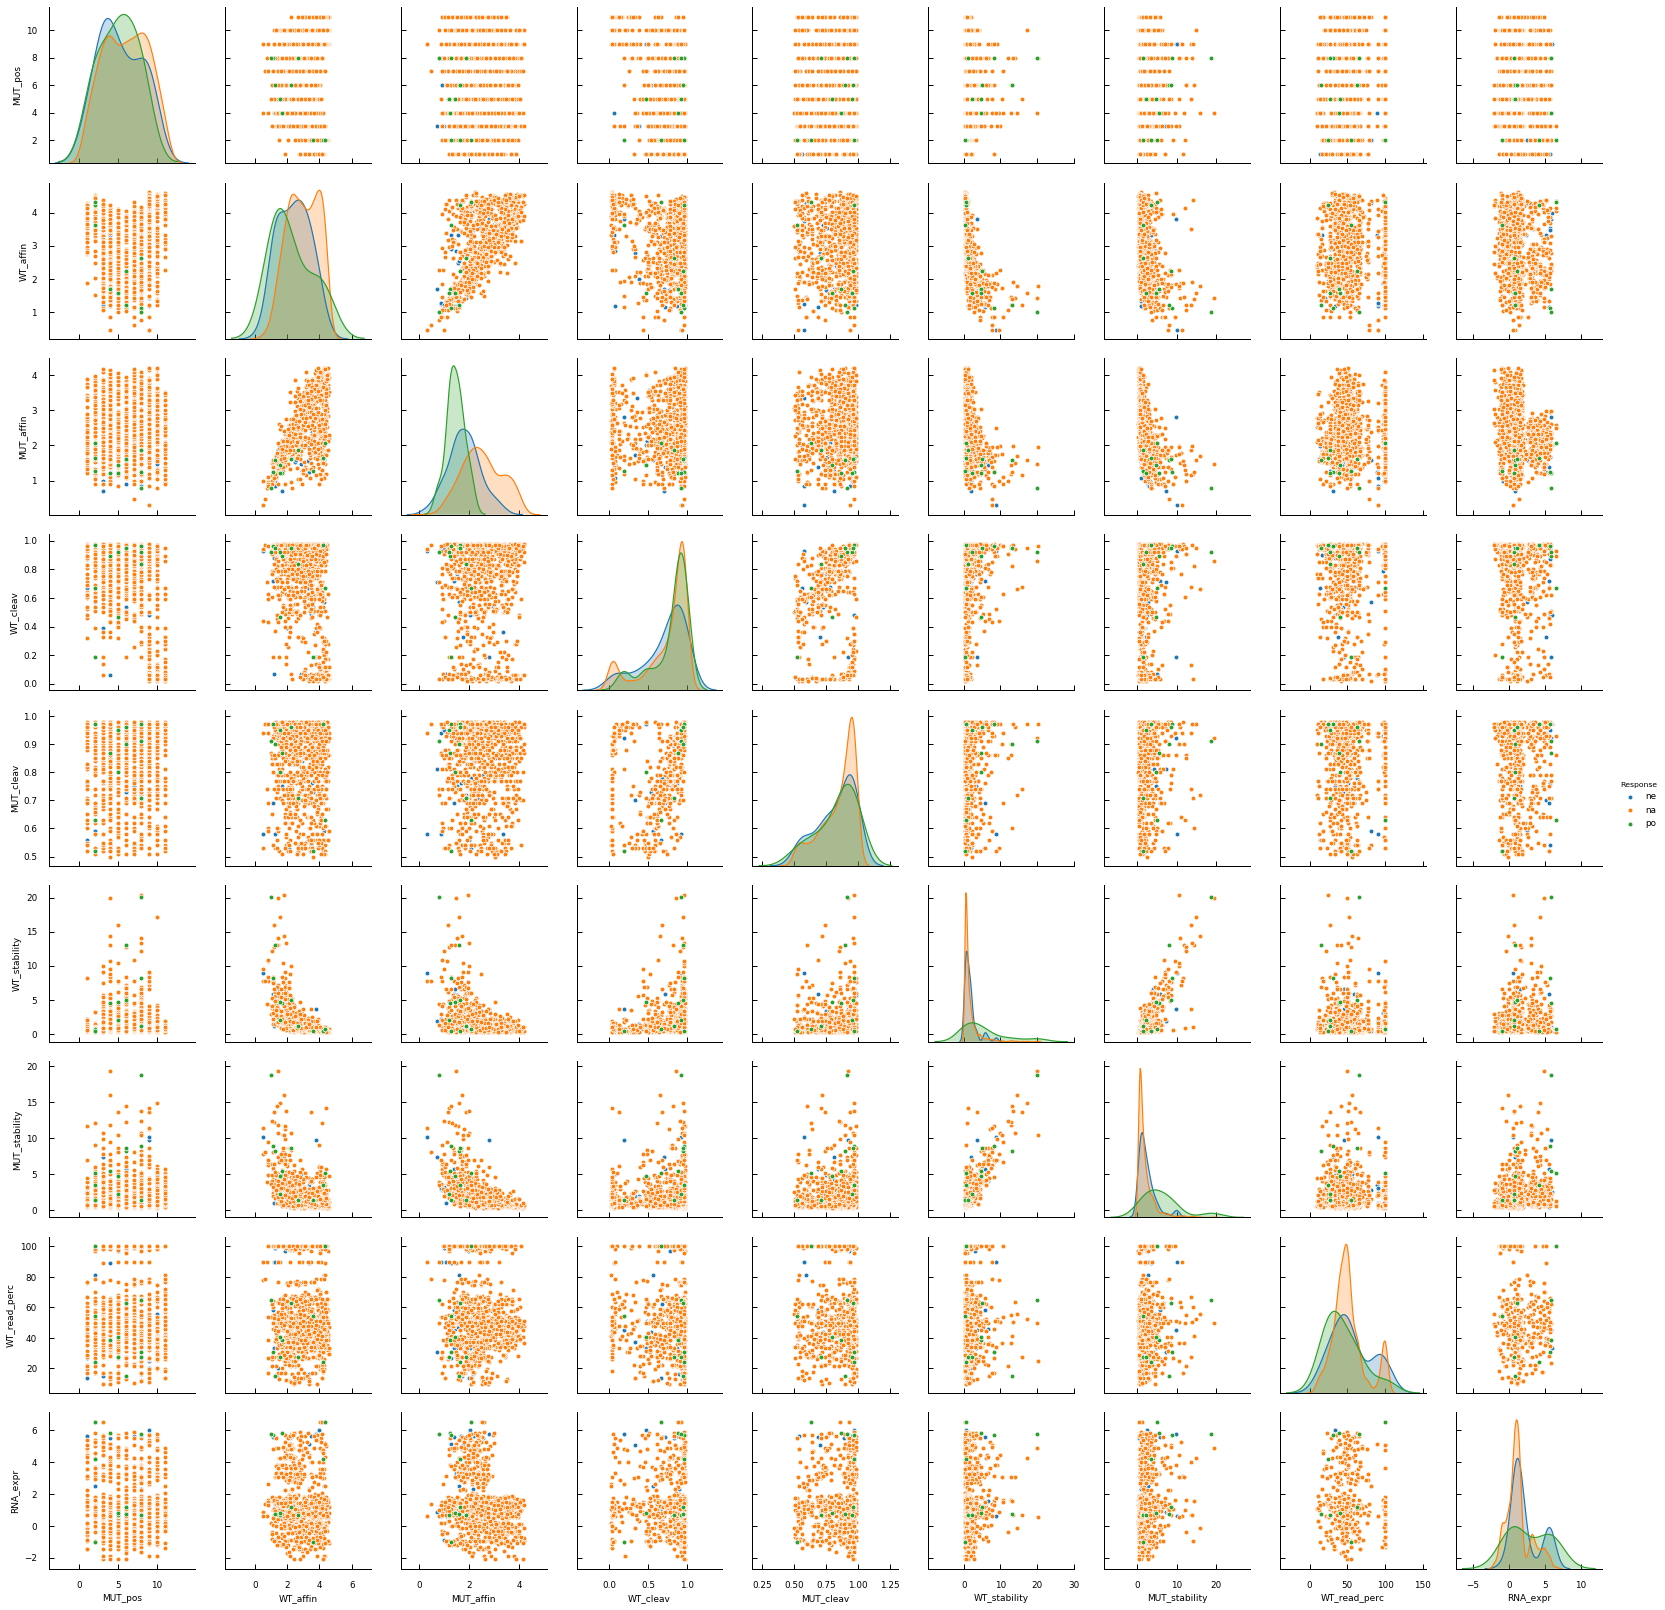

In [21]:
sns.set_context("paper", rc={"axes.labelsize":9})
sns.pairplot(X_im, hue="Response")

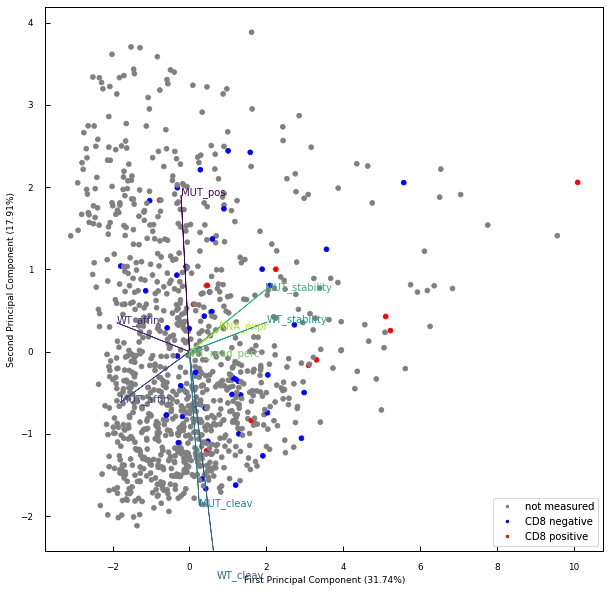

In [23]:
color_dict={'ne':'blue', 'po':'red', 'na': 'gray'}
cols_im = [color_dict[X_im['Response'][i]] for i in range(len(X_im['Response']))]

pca = PCA() #create an empty PCA object

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_im_scaled = scaler.fit_transform(X_im_num)

x_pca = pca.fit_transform(X_im_scaled) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cols_im)
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))

feature_vectors = pca.components_.T
arrow_size = 4

# projections of the original features
cmap = cm.get_cmap('viridis')
n = feature_vectors.shape[0]
for i, v in enumerate(feature_vectors): # enumerate over the rows of feature_vectors
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], head_width=0.00008, head_length=0.00008, width=0.00005,
              color=cmap((1.0 * i) / n))
    text_pos = -0.005 if v[0] < 0 else 0.0001
    plt.text(v[0]*arrow_size+text_pos, v[1]*arrow_size+0.0001, X_im_num.columns[i], 
            color=cmap((1.0 * i) / n),fontsize=10)
    
handles = []
handles.append(Line2D([], [], color="gray", ls="", marker=".", label="not measured"))
handles.append(Line2D([], [], color="blue", ls="", marker=".", label="CD8 negative"))
handles.append(Line2D([], [], color="red", ls="", marker=".", label="CD8 positive"))
legend = plt.legend(handles=handles, loc=4, prop={'size': 10})
plt.gca().add_artist(legend)

    
plt.show()

### Independent Component Analysis <a class="anchor" id="ICA-bullet"></a>

Independent Component Analysis (ICA) comes from the field of signal processing, where it was developped to deconvolve an additive mixture of signals into the source components. Mixtures tend to be gaussian and individual sources non-gaussian and PCA will fail ro recover the sources. In ICA we will not look for directions with the largest variance as in PCA, but for directions with the most non-gaussian distributions. This can also be an informative approach for biological data, where the non-gaussian signal often correspond to informative feature combinations. Also the directions found by ICA do not need to be orthogonal allowing more fexibility in the source decomposition.

In ICA we look for independent components (IC) of a $N$x$M$ data matrix $\pmb{X}$, where the ICs are represented as rows of a $M$x$M$ matrix $\pmb{W}$. ICA looks for an IC basis $\pmb{W}$ such that the columns $\pmb{S}_j$ of the $N$x$M$ source matrix $\pmb{S}=\pmb{X}\pmb{W}^T$ are as non-Gaussian as possible i.e. they maximize a function $F(\pmb{S}_i)$ that is the larger the more $S_{ij}, i=1..N$ deviate from a Gaussian distribution. Before finding the independent components, the data matrix $\pmb{X}$ is usually 'whitened' (see Appendix). 

sklearn provides the [FastICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA.transform) algorithm for ICA decomposition (see [Hyvärinen & Oja, Neural Networks, 2000](https://www.sciencedirect.com/science/article/abs/pii/S0893608000000265?via%3Dihub)). It provides fit($\pmb{X}$) and transform($\pmb{X}$) methods. fit() calculates the IC matrix $\pmb{W}$ (stored in FastICA.components_), the whithening mean $m=\frac{1}{N}\sum_{k=1}^{N}x_{kj}$ (stored in FastICA.means_), as well as the the mixing matrix $\pmb{A}$ (stored in FastICA.mixing_), $\pmb{X}=\pmb{S}\pmb{A}^T+m$, which is the (pseudo) inverse of $\pmb{W}$.

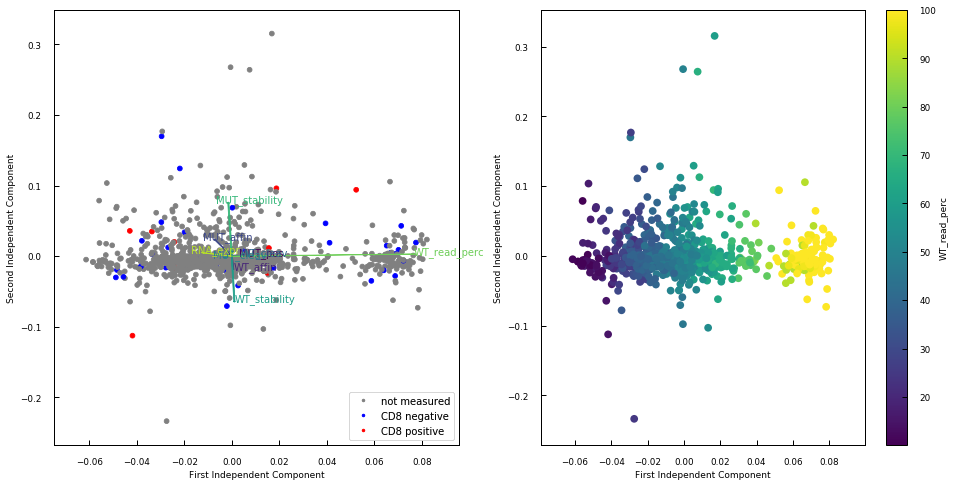

In [24]:
from sklearn.decomposition import FastICA

ica = FastICA(whiten=True, random_state=1,n_components=9)

ica.fit(X_im_num)
x_ica = ica.transform(X_im_num)

plt.subplots(figsize=(16,8))

plt.subplot(1,2,1)
plt.scatter(x_ica[:,0],x_ica[:,1],c=cols_im)
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

feature_vectors = ica.components_.T

arrow_size = 0.08

# projections of the original features
cmap = cm.get_cmap('viridis')
n = feature_vectors.shape[0]
for i, v in enumerate(feature_vectors): # enumerate over the rows of feature_vectors
    v = v/np.linalg.norm(v)
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], head_width=0.0008, head_length=0.0008, width=0.0005,
              color=cmap((1.0 * i) / n))
    text_pos = -0.005 if v[0] < 0 else 0.0001
    plt.text(v[0]*arrow_size+text_pos, v[1]*arrow_size+0.0001, X_im_num.columns[i], 
            color=cmap((1.0 * i) / n),fontsize=10)
    

handles = []
handles.append(Line2D([], [], color="gray", ls="", marker=".", label="not measured"))
handles.append(Line2D([], [], color="blue", ls="", marker=".", label="CD8 negative"))
handles.append(Line2D([], [], color="red", ls="", marker=".", label="CD8 positive"))
legend = plt.legend(handles=handles, loc=4, prop={'size': 10})
plt.gca().add_artist(legend)


plt.subplot(1,2,2)
feature = 'WT_read_perc'
sc =  plt.scatter(x_ica[:,0],x_ica[:,1],c=X_im_num[feature], s=60, lw=0, cmap='viridis')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
cb = plt.colorbar(sc)
cb.set_label(feature)


plt.show()


In [548]:
df_comp = pd.DataFrame(ica.components_,columns=X_im_num.columns)
df_comp.head(9)

MUT_pos  WT_affin  MUT_affin  WT_cleav  MUT_cleav  WT_stability  \
0  0.000523  0.000437  -0.006015  0.007678  -0.010100      0.000434   
1  0.000086 -0.014098   0.019840  0.001636  -0.004682     -0.025531   
2  0.000159  0.024854   0.020160  0.021152  -0.059908      0.003874   
3 -0.000226  0.005294   0.000741  0.008327  -0.016789      0.001661   
4 -0.001431 -0.000251  -0.009447 -0.054565  -0.157070      0.002295   
5  0.013107  0.010637  -0.009217  0.060037  -0.065844     -0.000395   
6  0.002457  0.001085  -0.000695  0.123527  -0.211230     -0.002681   
7 -0.000973 -0.051795   0.059136 -0.072437   0.037894     -0.007804   
8 -0.000368  0.013513  -0.001218 -0.001501   0.002914      0.016372   

   MUT_stability  WT_read_perc  RNA_expr  
0      -0.000554      0.001379 -0.002837  
1       0.028847      0.000055  0.001135  
2       0.001454      0.000200 -0.000324  
3      -0.003485      0.000345  0.018230  
4      -0.002738     -0.000014 -0.000518  
5      -0.000050     -0.000038  0.001859  
6       0.002254     -0.000030  0.000399  
7       0.008152      0.000088  0.002843  
8      -0.000341      0.000005  0.000163

### t-SNE <a class="anchor" id="tsne-bullet"></a>

t-SNE (t-distributed Stochstic Neighbourhood Embedding) is a dimensionality reduction algorithm introduced by [Maaten and Hinton, 2008](https://www.jmlr.org/papers/v9/vandermaaten08a.html). Unlike PCA or ICA it is not a linear method. 

#### A little bit of mathematics:

t-SNE assumes that the in the high dimensional data points are normally distributed with variances $\sigma_i^2$. Namely distance between points $\bf{x_i}$ and $\bf{x_j}$ is represented as: 

$p_{i|j}=\frac{exp(-||x_{i}-x_{j}||^2/(2\sigma_i^2))}{\sum_{k\neq_i}exp(-||x_{i}-x_{k}||^2/(2\sigma_i^2))}$

For the representation in the low dimensional space, t-SNE uses a heavy tailed t-distribution, which does not penalize large distances much. This gives us the flexibility needed to stretch the high dimensional data onto a low dimensional space and will allow better visual separability of the clusters. 

$q_{i|j}=\frac{(1+||y_{i}-y_{j}||^2)^{-1}}{\sum_{k\neq_i}(1+||y_{i}-y_{k}||^2)^{-1}}$

t-SNE forces these two distributions to be as close as possible for a "good" representation. As the similarity measure between the $P_i$ and $Q_i$ distributions they use the Kullback-Leibler divergence:

$C=\sum_{i}KL(P_i||Q_i)=\sum_{i}\sum_{j}p_{i|j}log(\frac{p_{i|j}}{q_{i|j}})$

If the $\sigma_i^2$ values are known t-SNE finds a local minimum in $C({y_i})$ by a gradient descent algorithm. In order to fix the $\sigma_i^2$ values t-SNE uses the 'perplexity' parameter:

$Perp(x_i)=2^{-\sum_{j}p_{j|i}log(p_{j|i})}$

The higher the `perplexity`, the higher the entropy and the larger $\sigma_i$. `perplexity` therefore reflects the  number of neighbors to consider for the calculation of $p_{i|j}$. A constant perplexity assures that each point will consider approximately the same number of neighbours.

Finally, t-SNE does neither conserve distances nor densities : it is trully a visualization technique and should not be used with other clustering techniques that require distance or density conservation between full and reduced space.

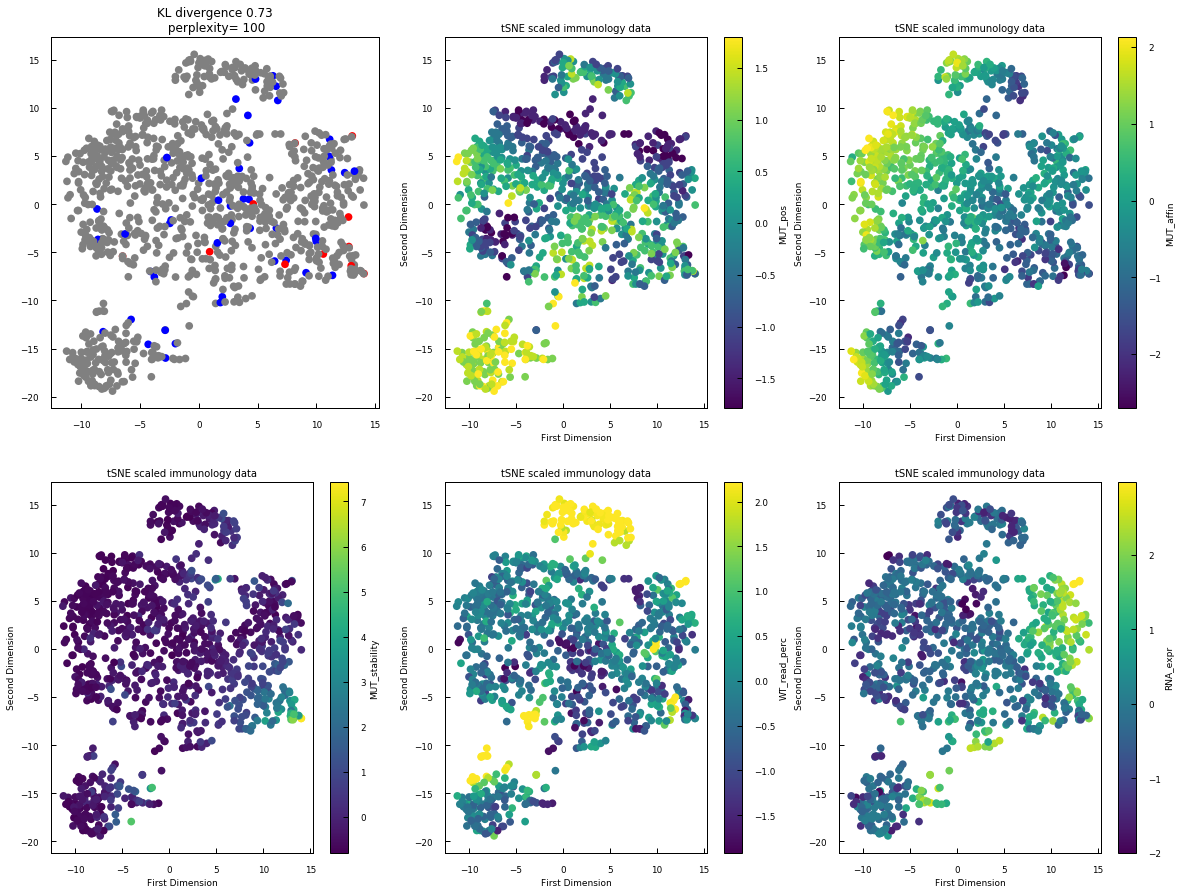

In [25]:
from sklearn.manifold import TSNE

perplexity = 100
tsne=TSNE(n_components=2,perplexity=perplexity).fit(X_im_scaled)#create the T-SNE object and fit the data

plt.subplots(figsize=(20,15))

plt.subplot(2,3,1)
X_embedded = tsne.embedding_#project the data to the new manifold using the fitted function found before
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], color=cols_im, s=60, lw=0)
plt.title('KL divergence {0:.2f}\n perplexity= {1}'.format(tsne.kl_divergence_,perplexity),fontsize=12)

j = 2
for cl in ['MUT_pos','MUT_affin','MUT_stability','WT_read_perc','RNA_expr']:
    plt.subplot(2,3,j)
    i = np.where(X_im.columns==cl)[0][0]
    X_embedded = tsne.embedding_ #project the data to the new manifold using the fitted function found before
    sc = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_im_scaled[:,i], s=60, lw=0,cmap='viridis')
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    cb = plt.colorbar(sc)
    cb.set_label(cl)
    plt.title('tSNE scaled immunology data',fontsize=10)
    j += 1

plt.show()


Making a direct correspondance between the new and the former basis is not straight forward, since the transformation is non-linear and dependent on the position in the reduced space. Yet to get a feeling about what the features represent you can color code the feature values and see how they change in the transformed space.

We see that some clusters are formed by distinct feature values. For example one cluster is formed by peptides with 'WT_read_perc' of 100. Features with descrete values can split up the t-SNE plot into seperate parts.

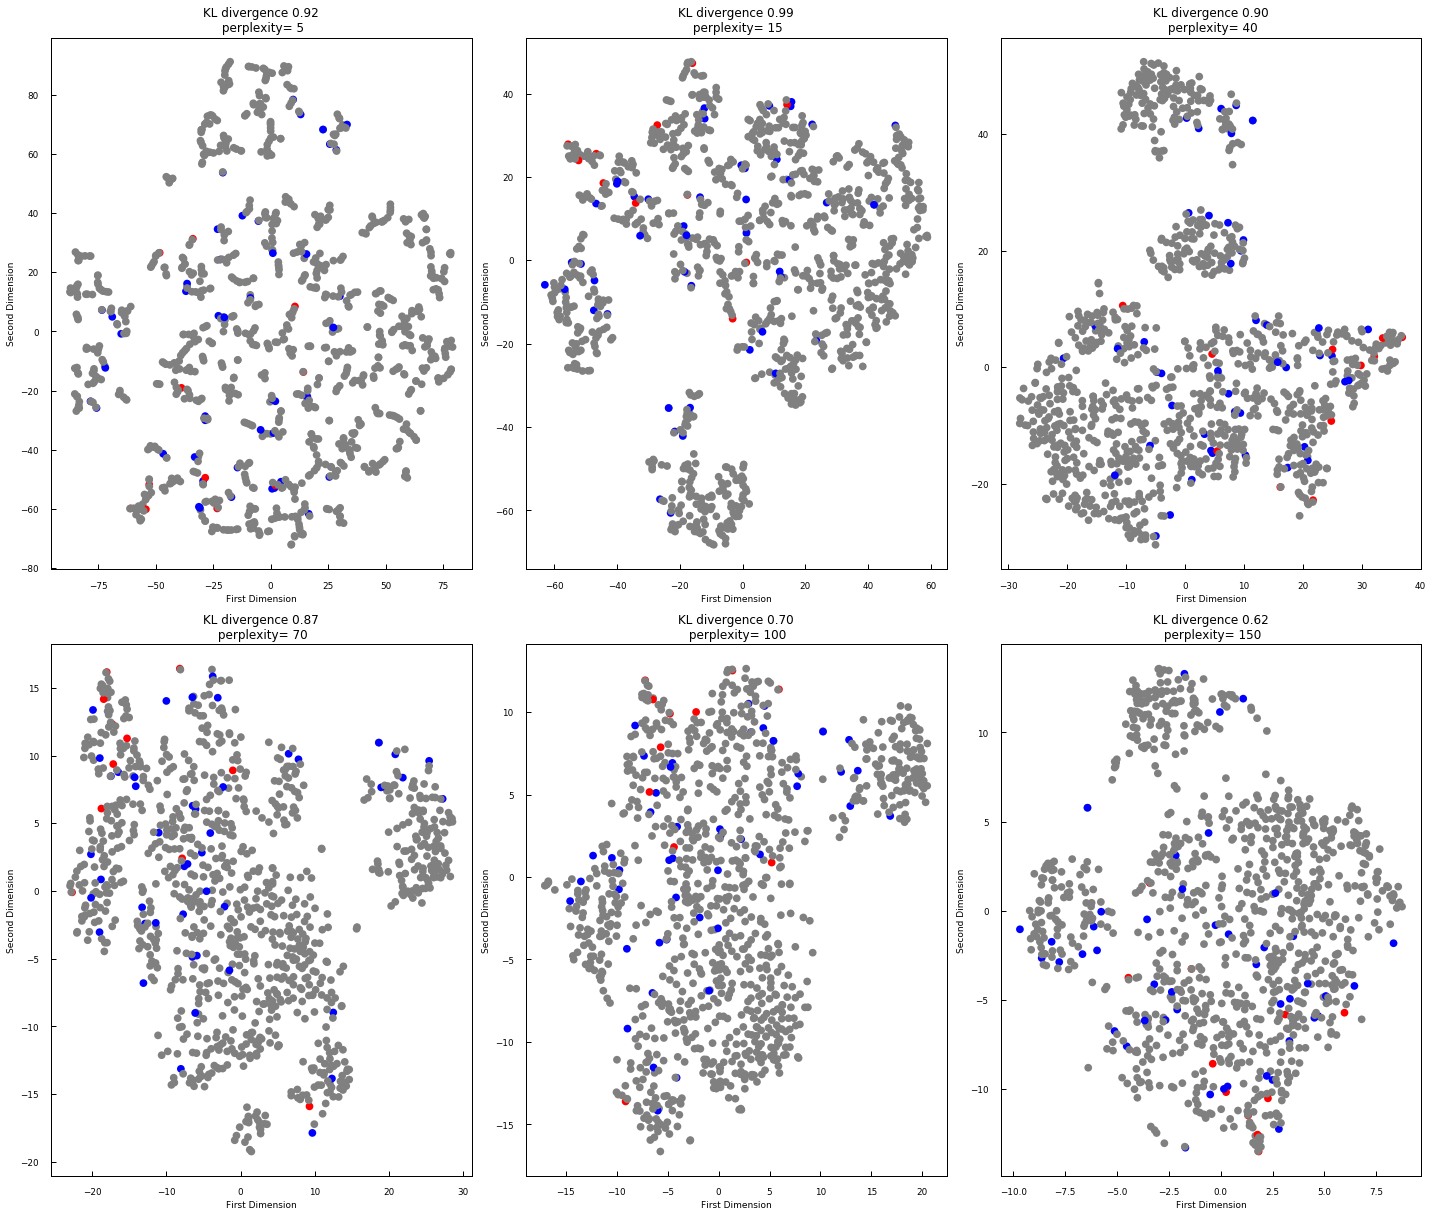

In [26]:
p=[5,15,40,70,100,150] #perplexity parameters to test
plt.subplots(figsize=(20,17))
for j in range(len(p)):
    plt.subplot(2,3,j+1)
    tsne=TSNE(n_components=2,perplexity=p[j]).fit(X_im_scaled)#create the T-SNE object and fit the data

    X_embedded = tsne.embedding_#project the data to the new manifold using the fitted function found before
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], color=cols_im, s=60, lw=0)
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    plt.title('KL divergence {0:.2f}\n perplexity= {1}'.format(tsne.kl_divergence_,p[j]),fontsize=12)
plt.tight_layout()
plt.show()

You can also see that the perplexity parameter determines the topology of the results. It is your guess to pick a perplexity parameter that gives the best representation of your data. For more details I highly encourage everybody to take a look at this [article](https://distill.pub/2016/misread-tsne/)

# Clustering <a class="anchor" id="fifth-bullet"></a>

Clustering is an unsupervised method that serves many puposes:

<ol>
<li>Pattern detection: discover hidden patterns in your data</li>
<li>Compression: replace all cluster members by one representive</li>
<li>Data augmentation: replace noisy feature vectors by the cluster consensus vector</li>
<li>Dimensionality reduction: replace a feature vector by cluster similarities</li>
<li>Outlier detection: detect feature vectors far away from cluster centers</li>
<li>Semisupervised learning: assign cluster labels to unlabeled cluster members</li>
<li>...</li>
</ol>

If you find some cluster-like structures in your data and if they correspond to one of your hypothesis then you already came a long way. Rarely you can get there in one step, but you need to carefully clean and normalize your data to discover these structures. Be aware that clustering algorithms are not magical techniques that give you a straight answer: you will need to find good hyperparameters for the model to work, and your expertise and understanding of the data is crutial to obtain good results.

## K-means clustering <a class="anchor" id="Kmeans-bullet"></a>

The [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) algorithm is a widely used clustering algorithm. The K-means algorithm aims at finding the right partition of the data ($\pmb{X_1},...,\pmb{X_n}$) into $K$ clusters $\pmb{C}={C_1,...,C_K}$ so that the within cluster sum of squares (inertia) is minimized:

$\pmb{C}=argmin_{\pmb{C}} \sum_{k=1}^{K}\sum_{i \in C_k}||\pmb{X_i}-\pmb{\mu_k}||^2$

$\pmb{\mu_k}=\frac{1}{|C_k|}\sum_{i \in C_k}\pmb{X_i}$

K-means requires the number of clusters as input. The greedy algorithm consists of 3 main parts:
<ol>
<li>Choose $K$ points from $\pmb{X_i}$ as initial values for $\pmb{\mu_k}$. These initial points should be spread out over the dataset</li>
<li>Assignment step: assign each $\pmb{X_i}$ to a cluster $C_k=argmin_{C_k} ||\pmb{X_i}-\pmb{\mu_k}||^2$ </li>
<li>Update step: recalculate $\pmb{\mu_k}=\frac{1}{|C_k|}\sum_{i \in C_k}\pmb{X_i}$</li>
<li>Iterate steps 2 & 3 until convergence</li>
</ol>

For data with a cluster structure K-means complexity is often linear in the number of datapoints $\pmb{X_i}$ and it requires little additional memory. The data can be split into different chunks and the algo still works. Faster versions of the basic algorithm are available, e.g. [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans). This makes it an attractive algorithm for very large datasets.

K-means is a greedy algorithm, i.e. it will only find a local minimum of the inertia. Therefore it is good practice to run the algorithms several times with different initialization (random_state set to different values).

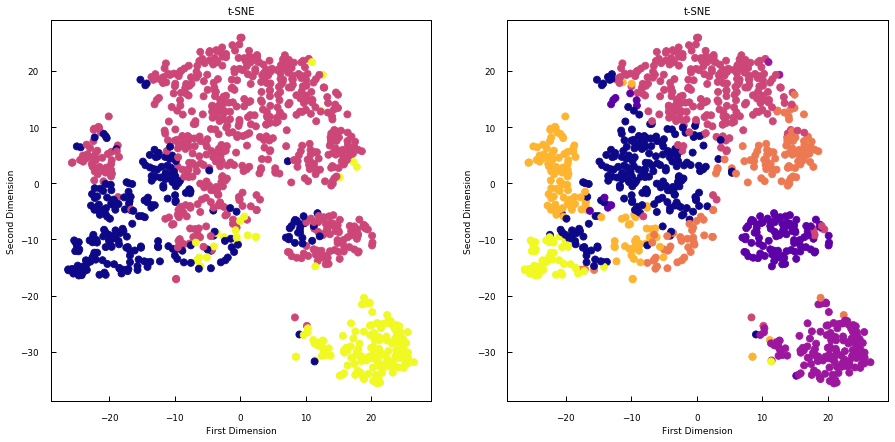

In [29]:
from sklearn import cluster

tsne=TSNE(n_components=2,perplexity=50).fit(X_im_scaled)
X_im_embedded = tsne.embedding_ 

kmeans_3 = cluster.KMeans(3)#create a K means clustering object that will have 3 clusters
kmeans_3.fit(X_im_scaled)

kmeans_7 = cluster.KMeans(7)#create a K means clustering object that will have 7 clusters
kmeans_7.fit(X_im_scaled)


plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.scatter(X_im_embedded[:,0],X_im_embedded[:,1],c=kmeans_3.labels_,s=50,cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('t-SNE',fontsize=10)

plt.subplot(1,2,2)
plt.scatter(X_im_embedded[:,0],X_im_embedded[:,1],c=kmeans_7.labels_,s=50,cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('t-SNE',fontsize=10)

plt.show()

We see that the number of clusters defines the k-means clustering outcome. It is difficult to say by looking at the t-SNE projections, whether 3 or 7 clusters better reveal underlying patterns. Another way to find the 'optimal' number of clusters is to use any of the clustering quality metrics provided by [skilearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Here we will use the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) metric: 

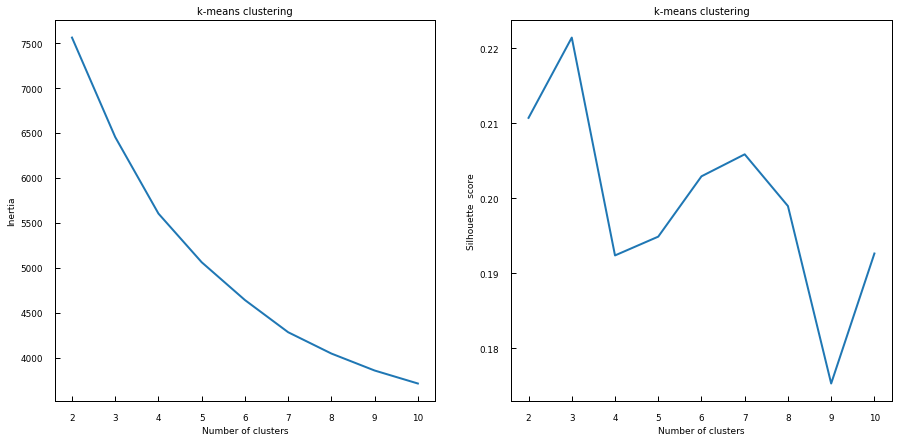

In [28]:
from sklearn import cluster
from sklearn.metrics import silhouette_score

nr_clusters = np.arange(9)+2

inertias = []
silhouettes = []
for n in nr_clusters:
    kmeans = cluster.KMeans(n)
    kmeans.fit(X_im_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_im_scaled,kmeans.labels_))

plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(nr_clusters, inertias, ls="-", lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('k-means clustering',fontsize=10)

plt.subplot(1,2,2)
plt.plot(nr_clusters, silhouettes, ls="-", lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette  score')
plt.title('k-means clustering',fontsize=10)


plt.show()

The plot to the left gives us the inertia as a function of the number of clusters (remember the inertia is the sum of squares, the score k-means is trying to minimize). The inertia decreases as the number of clusters increases (which is expected) and does not give us much information about the best cluster count to use. The silhouette score is more informative (left plot). 

The silhouette score is calculated using the mean intra-cluster distance $a$ and the mean nearest-cluster distance $b$ for each sample. The Silhouette Coefficient for a sample is $SC=\frac{(b - a)}{max(a, b)}$, where $b$ is the distance between a sample and the nearest cluster that the sample is not a part of. The skilearn function returns the mean Silhouette score over all samples for a given clustering result. To obtain the values for each sample, use silhouette_samples. $SC$ is always between -1 (bad clustering) and 1 (perfect clustering).

We see that $SC$ proposes $K=3$ and has a second local maximum at $K=7$ (see above).

## Hierarchical clustering <a class="anchor" id="HC-bullet"></a>

Hierarchical clustering is an algorithms that iteratively merges data points or groups of data points. It starts with $N$ clusters, one cluster per data point. It first calculates the pairwise distances between all clusters. It then selects the two closests clusters and merges them into a new cluster. Next it recalculates the distances between the newly formed cluster and the remaining clusters. It repeats these steps until a specified number of clusters is reached or until all distances between clusters are larger than a specified threshold.

Since this type of algorithm requires pairwise distance calculations and does this up to $N$ times until all clusters are merged, the complexity of the algorithms is $N^3$. This is often too slow for large datasets. The algorithms can be accelarated by speeding up disnace calculations or initialize the clusters with a coarse k-means clustering.

The main advantage of the algorithm is the visualization of the results as dendograms and the easy interpretability of the results.

<Figure size 1440x2160 with 0 Axes>

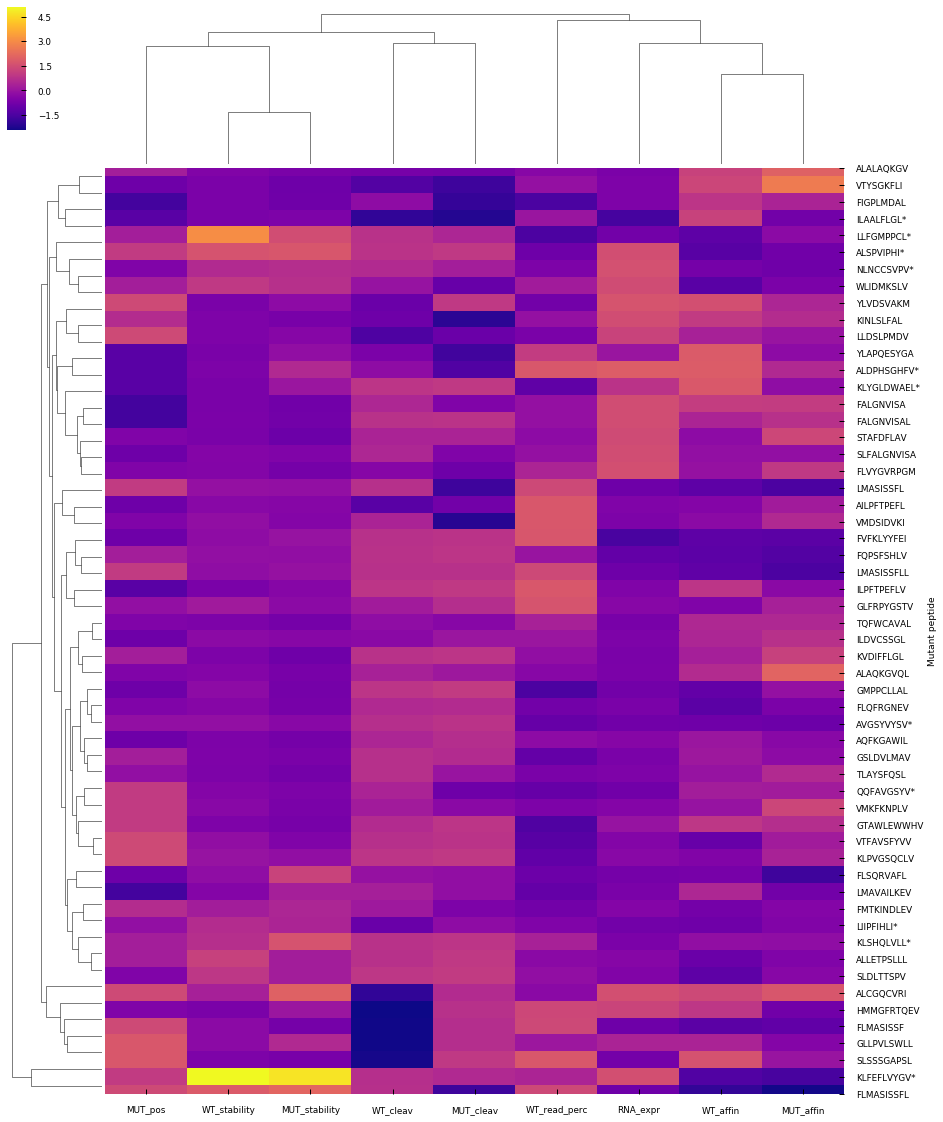

In [30]:
plt.figure(figsize=(20,30))
sns.clustermap(X_im_num[X_im['Response']!="na"],z_score=1,figsize=(15,20),cmap='plasma')
plt.show()

Next we would like perform hierachical clustering using the sklearn [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) class. We  will test an array of  numbers of clusters in order to choose the optimal number of clusters. The silhouette score does not work well here, so we use a different clustering metric in sklearn called the [davies_bouldin_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score). This score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

Counter({0: 488, 3: 323, 2: 138, 1: 85})


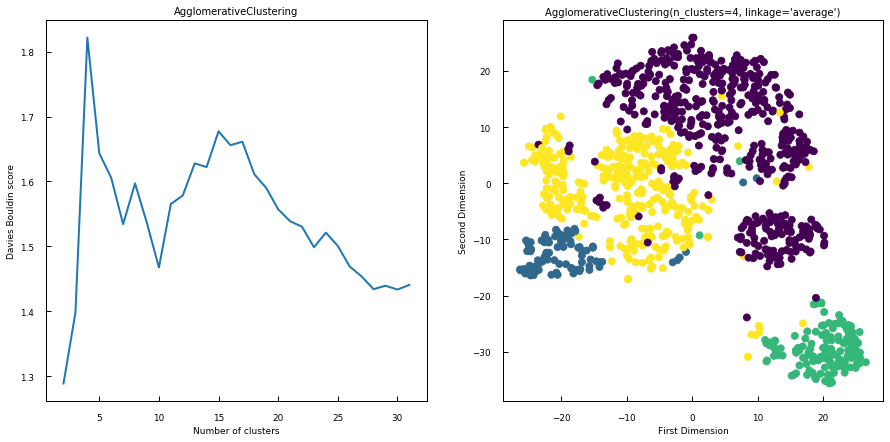

In [31]:
from sklearn.metrics import davies_bouldin_score
from collections import Counter

nr_clusters = np.arange(30)+2

scores = []
best_labels = []
best_score = -1
best_nr_clusters = 0

for n in nr_clusters:
    hc = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    hc.fit(X_im_scaled)
    idx = hc.labels_ >= -1
    cl_cnt = len(np.unique(hc.labels_[idx]))
    score = davies_bouldin_score(X_im_scaled[idx],hc.labels_[idx]) if cl_cnt > 1  else 0
    
    if score > best_score:
        best_labels = hc.labels_
        best_score = score
        best_nr_clusters = n
        
    scores.append(score)

print(Counter(best_labels))
plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(nr_clusters, scores, ls="-", lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin score')
plt.title('AgglomerativeClustering',fontsize=10)

plt.subplot(1,2,2)
plt.scatter(X_im_embedded[:,0],X_im_embedded[:,1],c=best_labels,s=50,cmap='viridis')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('AgglomerativeClustering(n_clusters={0}, linkage=\'average\')'.format(best_nr_clusters),fontsize=10)

plt.show()

Now we use the scipy [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function to plot the corresponding dendrogram.

In [32]:
#Just some code to plot the dendrogram that will be explained below
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

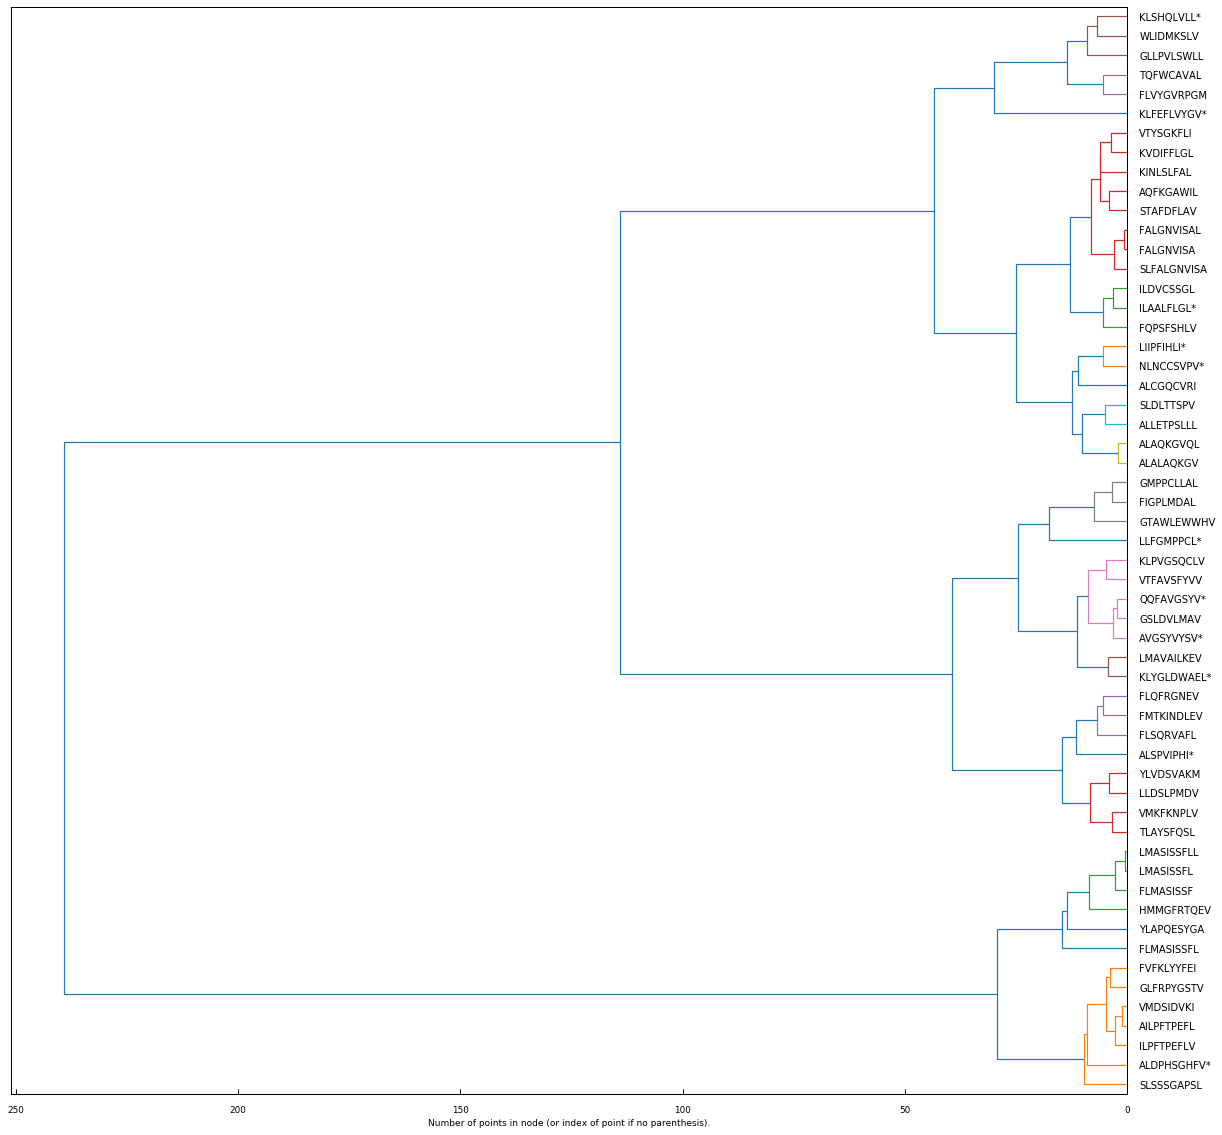

In [33]:
from sklearn import cluster
pylab.rcParams['figure.figsize'] = 20, 20
dendro = cluster.AgglomerativeClustering(
        n_clusters=None,distance_threshold=0, linkage='ward')#here n_cluster = none because I want to explore the link
#between threshold choice and number of clusters
dendro.fit(X_im_num[X_im['Response']!="na"])
plot_dendrogram(dendro,
                color_threshold=10,
                labels=X_im[X_im['Response']!="na"].index, 
                orientation='left',leaf_font_size=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The dendogram is the representation of the effect of your-cut off to define a cluster. For example if you decide that your threshold is going to be 15 : then you only have two clusters. If you change it to 10 you will have 3 clusters. If you put it to 0 : each point is a cluster!

## DBSCAN <a class="anchor" id="DBSCAN-bullet"></a>

DBSCAN - Density-Based Spatial Clustering of Applications with Noise [Ester et al., Proc KDD, 1996](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.121.9220) finds core points of high density and expands clusters from them. It works well for data which contains clusters of similar density. The algorithm starts by defining core points (points that are densely packed : at least 'min_samples' points within a distance 'eps' from each other). Then it expands a seed cluster $C_k$ by adding a point $p_j$ to the cluster if there a point $p_{l} \in C_k$ with $dist(p_j-p_{l})<\epsilon$. Points that cannot be linked to a seed cluster are marked as outliers.

DBSCAN The average run time complexity of DBSCAN is $O(nlogn)$ (worst case $O(n^2)$), which makes attractive for large datasets.

First, we need to have an idea in which range $\epsilon$ will be:

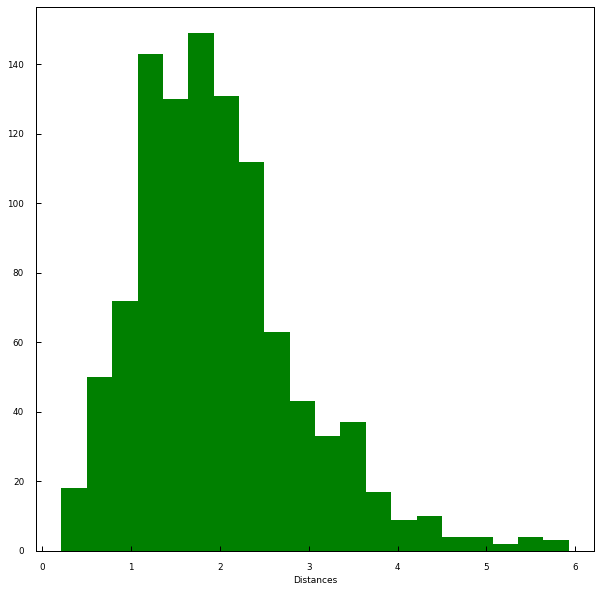

In [34]:
from sklearn.metrics import pairwise_distances

D = pd.DataFrame(pairwise_distances(X_im_scaled, metric='minkowski', p=1.))
dists = D[D>0].min(axis=1) # get nearest neighbor distances

plt.figure(figsize=(10,10))
plt.hist(dists, color="g",bins=20)
plt.xlabel("Distances")
plt.show()

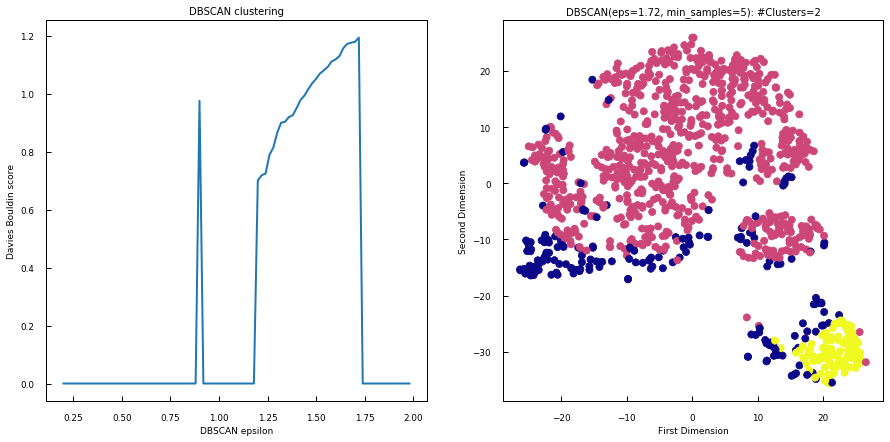

In [35]:
from sklearn import cluster

eps = np.arange(0.2, 2, 0.02)
nr_samples = np.arange(5,30,5)

scores = []
best_labels = []
best_score = -1
best_eps = 0
best_nr_clusters = 0
best_min_samples = 0

for e in eps:
    best_eps_score = -1
    for n in nr_samples:
        dbscan = cluster.DBSCAN(eps=e, min_samples=20, p=1)
        dbscan.fit_predict(X_im_scaled)
        idx = dbscan.labels_ >= 0
        nr_clusters = len(np.unique(dbscan.labels_[idx]))
        score = davies_bouldin_score(X_im_scaled[idx],dbscan.labels_[idx]) if nr_clusters > 1 else 0

        if score > best_eps_score:
            best_eps_score = score
            
        if score > best_score:
            best_labels = dbscan.labels_
            best_score = score
            best_eps = e
            best_nr_clusters = nr_clusters
            best_min_samples = n

    scores.append(best_eps_score)

plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(eps, scores, ls="-", lw=2)
plt.xlabel('DBSCAN epsilon')
plt.ylabel('Davies Bouldin score')
plt.title('DBSCAN clustering',fontsize=10)

plt.subplot(1,2,2)
plt.scatter(X_im_embedded[:,0],X_im_embedded[:,1],c=best_labels,s=50,cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('DBSCAN(eps={0:.2f}, min_samples={1}): #Clusters={2}'.format(best_eps,best_min_samples,
                                                                       best_nr_clusters),fontsize=10)

plt.show()

# Appendix <a class="anchor" id="appendix-bullet"></a>

### 'Whiten' a data matrix <a class="anchor" id="whiten-bullet"></a>

'Whitening' is a process to reduce correlations between columns in a $NxM$ data matrix $\pmb{X}$ ($N$ samples and $M$ features). It uses PCA to transform $\pmb{X}$ into $\pmb{X'}$ with $\pmb{X'}^T\pmb{X'}=\pmb{\mathbb{1}}$. The process consists of 2 steps:

<ol>
<li>Zero centering around column means: $x_{ij}=x_{ij}-\frac{1}{N}\sum_{k=1}^{N}x_{kj}$</li>
<li>Rotation to PC basis and scaling: $\pmb{X'}=\pmb{X}\pmb{W}\pmb{D^{-\frac{1}{2}}}$, where $\pmb{W}$ is the matrix containing the PC's and D a diagonal matrix containing the variances. This transformation projects on the PC basis vectors and devides by the standard deviations.</li>
</ol>



### UMAP <a class="anchor" id="umap-bullet"></a>

t-SNE has some disadvantages:

<ol>
<li>Speed. t-SNE computations takes a long time for large datasets</li>
<li>Dimensions. t-SNE is not applicable for more than 2-3 dimensions</li>
<li>Global Structure: t-SNE preserves local but not global structure</li>
</ol>

There comes UMAP ([McInnes et al.,arxiv, 2018](https://arxiv.org/abs/1802.03426)), which you probably know from single cell RNA-seq papers. It is similar to t-SNE, but differs in some important details, which make it faster, applicable to more than 2 dimensions and preserve the global structure better. Here is how it works:

UMAP assumes a exponential weight between the high dimensional data points: 

$\mu_{ij}=e^{-\frac{d(x_{i},x_{j})-\rho_i}{\sigma_i}}$

$\rho_i$ is the distance $d(x_{i},x_{k})$ of $x_{i}$ to its nearest neighbor $x_{k}$. Let $NN(i,n)$ be the set of $n$ nearest neighbors of $x_i$. $sigma_i$ is chosen such that $\sum_{k \in NN(i,n)}\mu_{ik} = log_2(n)$. In contrast to t-SNE the weights are not normalized, which saves computation time.

Next the weights $mu_{ij}$ are turned into a weighted adjacency matrix and spectral clustering is used to find an initial embedding of the data points in the low dimensional space.

For the representation in the low dimensional space, UMAP uses a heavy tailed weight:

$\nu_{ij} = (1 + a(|x_i − x_j|_2^2)^b)^{−1}$

UMAP determines the parameters $a$ and $b$ by a least square fitting procedure. As a similarity measure between the $\mu_{ij}$ and $\nu_{ij}$ distributions it uses:

$C=-\sum_{i}\sum_{j}[\mu_{ij}log(\nu_{ij}) + (1-\mu_{ij})log(1-\nu_{ij})]$

UMAP uses stochastic gradient descent algorithm to minimize $C$. The spectrum clustering initialisation as well as the second term in $C$ are supposed to provide a better embedding for distant clusters compared to t-SNE.

UMAP implements an efficient nearest neighbor search and has an overall complexity of $O(N^{1.14})$.

The main input parameters for UMAP are

<ol>
<li>'n_components': dimension of the embedding</li>
<li>'n_neighbors': numer of nearest neigbors to consider (corresponds to $n$ in the text)</li>
<li>'min_dist': points in embedded space need to be separeted by a distance of at least 'min_dist'</li>
<li>'metric': metric to be used for measuring distances (corresponds to $d(x,y)$ in the text)</li>
</ol>

Further information and tutorials you can find un the [UMAP page](https://umap-learn.readthedocs.io/en/latest/index.html).

/Users/markusmueller/opt/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 260 separate connected components using meta-embedding (experimental)
  n_components


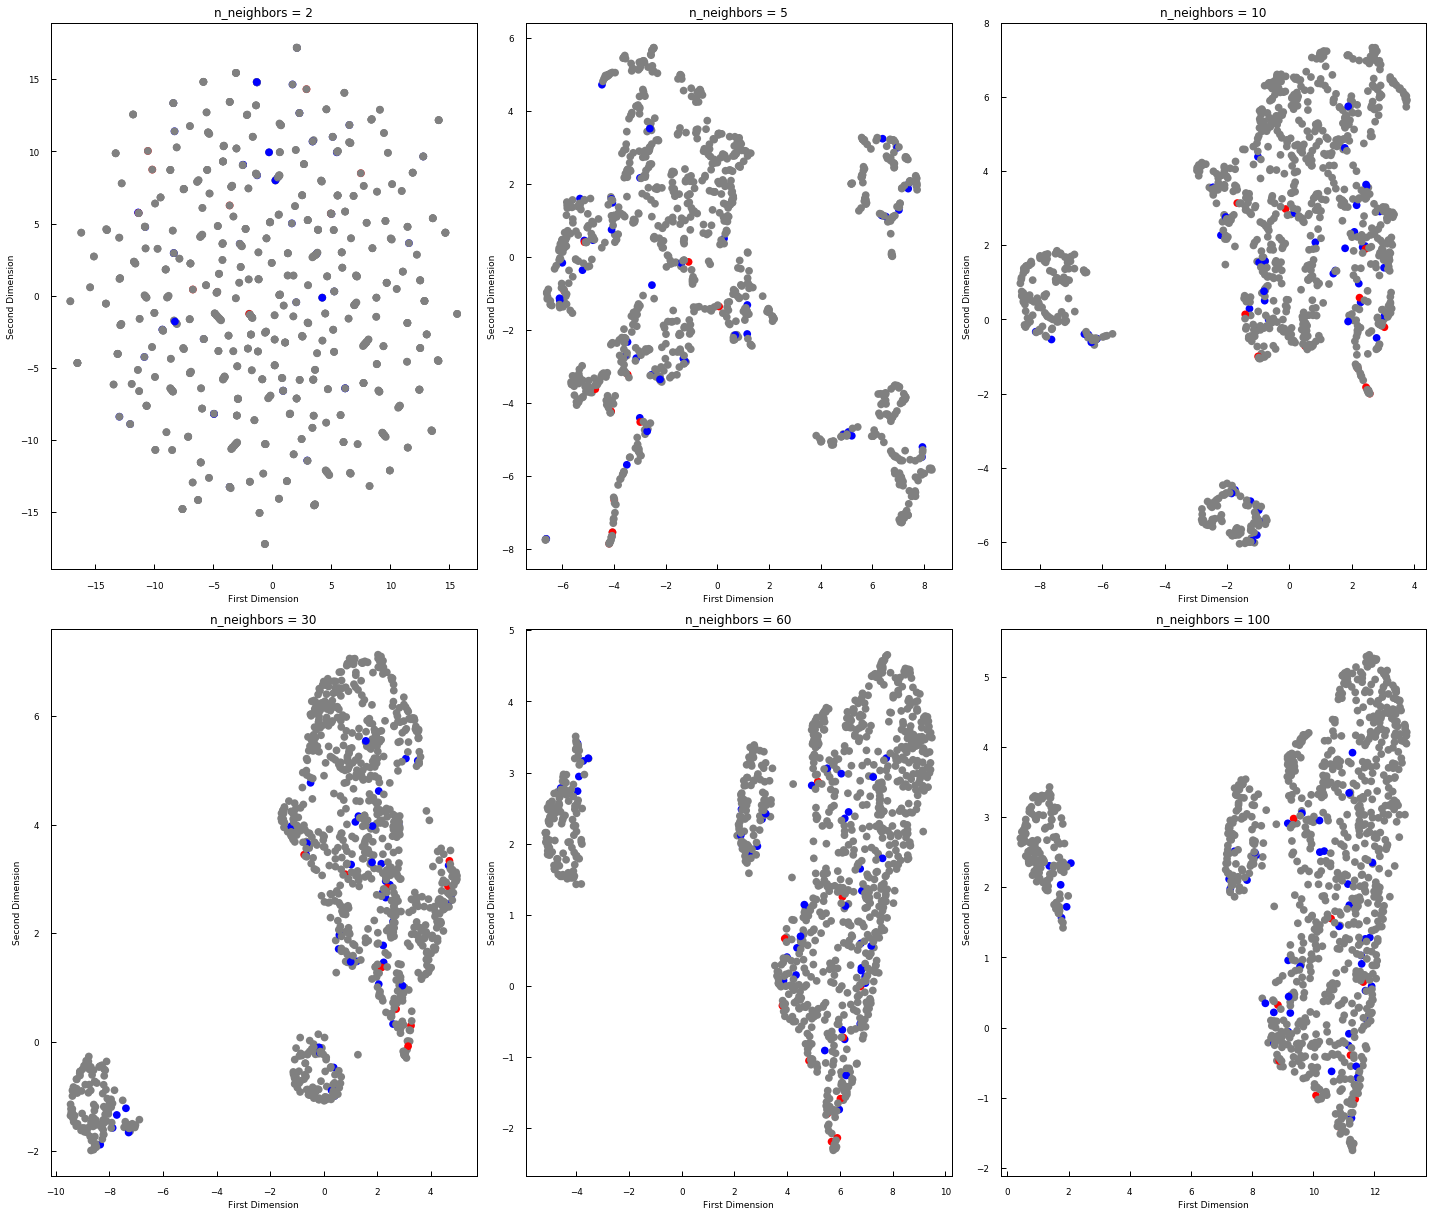

In [530]:
import umap.umap_ as umap

nn=[2,5,10,30,60,100] #n_neighbors parameters to test
plt.subplots(figsize=(20,17))
for j in range(len(nn)):
    plt.subplot(2,3,j+1)
    umaper = umap.UMAP(n_components=2,n_neighbors=nn[j])
    x_umap = umaper.fit_transform(X_im_scaled)

    plt.scatter(x_umap[:, 0], x_umap[:, 1], color=cols_im, s=60, lw=0)
    plt.title('n_neighbors = {0}'.format(nn[j]),fontsize=12)
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
plt.tight_layout()
plt.show()

[-1  0  1  2  3]


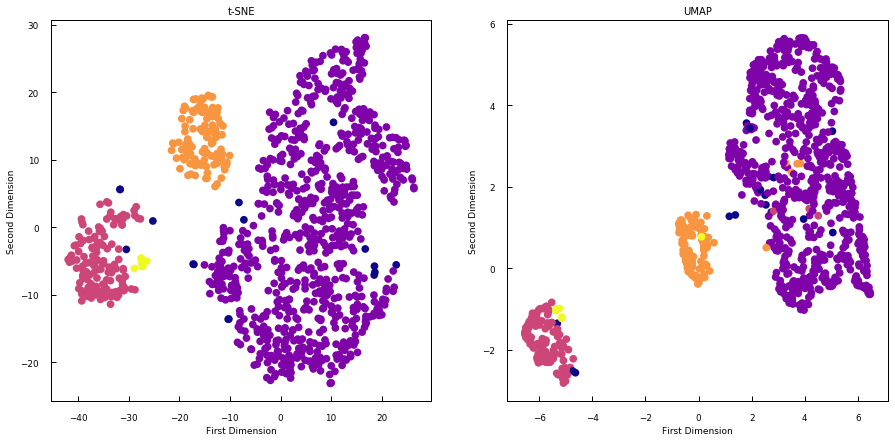

In [350]:
from sklearn import cluster

tsne=TSNE(n_components=2,perplexity=50).fit(X_im_scaled)
X_embedded = tsne.embedding_ 

umaper = umap.UMAP(n_components=2,n_neighbors=50)
x_umap = umaper.fit_transform(X_im_scaled)

dbscan = cluster.DBSCAN(2)
dbscan.fit(X_embedded[:,:2])

plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=dbscan.labels_, s=60, lw=0, cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('t-SNE',fontsize=10)

plt.subplot(1,2,2)
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=dbscan.labels_, s=60, lw=0, cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('UMAP',fontsize=10)

plt.show()

## Gaussian mixtures <a class="anchor" id="gm-bullet"></a>

In Gaussian mixture modeling [Fraley & Raftery, The Computer Journal, 1998](https://academic.oup.com/comjnl/article-abstract/41/8/578/360856) we represent the data $\pmb{X}$ as a mixture model normal probability distributions:

$p(\pmb{x}) = \sum_{i=1}^{K}\pi_iN(\pmb{x}|\pmb{\mu_i},\pmb{\Sigma}_i)$, 

where $N(\pmb{x}|\pmb{\mu},\pmb{\Sigma})$ is a multidimensional Gaussian distribution with mean $\pmb{\mu}$ and covariance matrix $\pmb{\Sigma}$. The method uses the expectation-maximization algorithm to find the mixture components $\pmb{\pi_i}$, $\pmb{\mu_i}$ and covariance matrix $\pmb{\Sigma}_i$.

The sklearn [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) class implements the algorithm. It allows you to specify the number of clusters ('n_components'), intitial values for the parameters and constrains on the covariance matrices $\pmb{\Sigma}_i$. 

A Bayesian version [BayesianGaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture) uses priors for the mixture parameters.

[0.02293219 0.0450145  0.05112547 0.051407   0.05669162 0.08290297
 0.11025838 0.13660086 0.16902512 0.27404189]


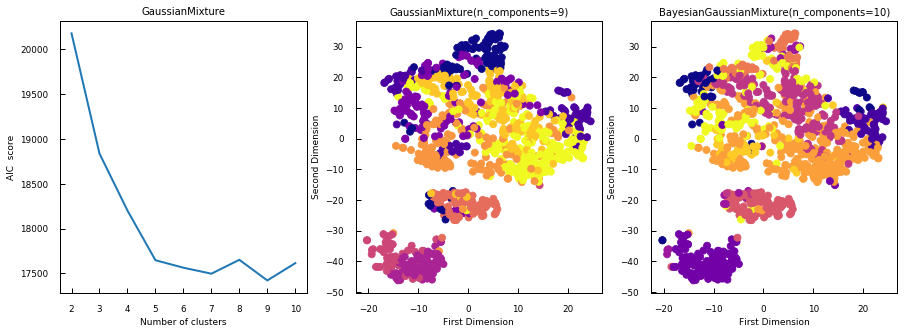

In [539]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

nr_clusters = np.arange(9)+2

aic = []
best_score = np.infty
best_nr_clusters = 0
for n in nr_clusters:
    gmm = mixture.GaussianMixture(n)
    gmm.fit(X_im_scaled)
    score = gmm.bic(X_im_scaled)
    aic.append(score)

    if score < best_score:
        best_score = score
        best_nr_clusters = n
        best_gmm = gmm
        
best_labels = best_gmm.predict(X_im_scaled)

bgmm = mixture.BayesianGaussianMixture(n_components=10,covariance_type='full',weight_concentration_prior=0.01)
bgmm.fit(X_im_scaled)
best_labels_bayes = bgmm.predict(X_im_scaled)
print(np.sort(bgmm.weights_))

plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(nr_clusters, aic, ls="-", lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('AIC  score')
plt.title('GaussianMixture',fontsize=10)

plt.subplot(1,3,2)
plt.scatter(X_im_embedded[:,0],X_im_embedded[:,1],c=best_labels,s=50,cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('GaussianMixture(n_components={0})'.format(best_nr_clusters),fontsize=10)

plt.subplot(1,3,3)
plt.scatter(X_im_embedded[:,0],X_im_embedded[:,1],c=best_labels_bayes,s=50,cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('BayesianGaussianMixture(n_components={0})'.format(10),fontsize=10)

plt.show()

## PCA for breast cancer data <a class="anchor" id="bc-bullet"></a>

The breast cancer dataset is an classic dataset that was used in an early ML application ([Wolberg et al, Cencer Letters, 1994](https://www.sciencedirect.com/science/article/abs/pii/030438359490099X?via%3Dihub)). In this paper 
fine-needle aspirates from breast tissues were digitally scanned. The cell images were processed by a automated software and 10 features describing size and shape of the cell nuclei were extracted. For each feature the mean, the maximum and the standard deviation were measured resulting in 30 features.

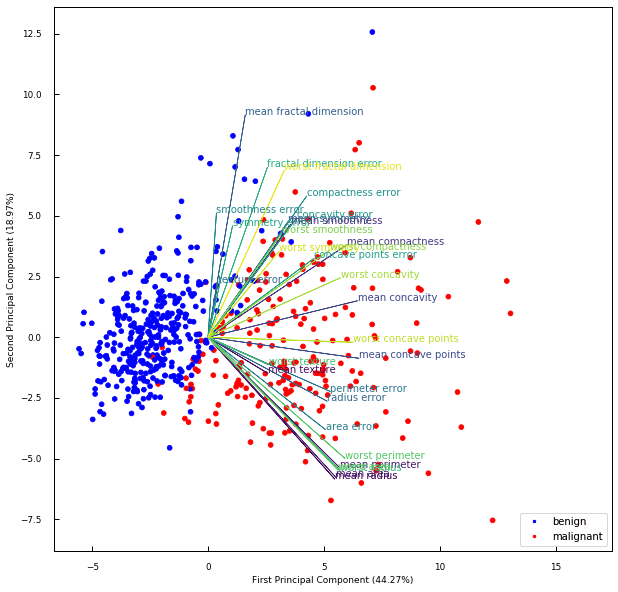

In [585]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

scaler = StandardScaler()
X_cancer = scaler.fit_transform(X_cancer)


df_cancer = pd.concat([pd.DataFrame(X_cancer,columns=cancer['feature_names']),\
                       pd.DataFrame(y_cancer,columns=['malignant'])],axis=1)

color_dict={0:'red', 1:'blue'}
cols_bcancer = [color_dict[y_cancer[i]] for i in range(df_cancer.shape[0])]

pca = PCA() #create an empty PCA object

from sklearn.preprocessing import StandardScaler

x_pca = pca.fit_transform(X_cancer) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cols_bcancer)
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))

feature_vectors = pca.components_.T
arrow_size = 25

# projections of the original features
cmap = cm.get_cmap('viridis')
n = feature_vectors.shape[0]
for i, v in enumerate(feature_vectors): # enumerate over the rows of feature_vectors
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], head_width=0.00008, head_length=0.00008, width=0.00005,
              color=cmap((1.0 * i) / n))
    text_pos = -0.005 if v[0] < 0 else 0.0001
    plt.text(v[0]*arrow_size+text_pos, v[1]*arrow_size+0.0001, df_cancer.columns[i], 
            color=cmap((1.0 * i) / n),fontsize=10)
    
handles = []
handles.append(Line2D([], [], color="blue", ls="", marker=".", label="benign"))
handles.append(Line2D([], [], color="red", ls="", marker=".", label="malignant"))
legend = plt.legend(handles=handles, loc=4, prop={'size': 10})
plt.gca().add_artist(legend)

    
plt.show()

## PCA for Iris data <a class="anchor" id="iris-bullet"></a>

In [586]:
from sklearn.datasets import load_iris
iris = load_iris()

df_iris = pd.concat([pd.DataFrame(iris['data'],columns=iris['feature_names']),\
                     pd.DataFrame(iris['target'],columns=['species'])],axis=1)

df_iris.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

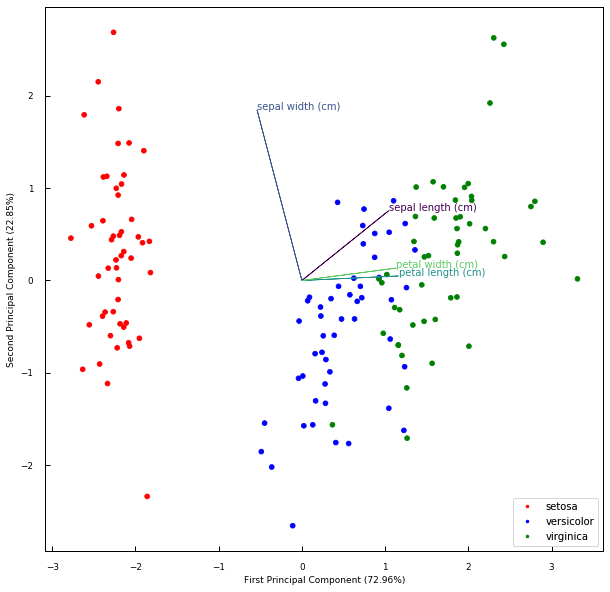

In [589]:
from sklearn.datasets import load_iris
iris = load_iris()

df_iris = pd.concat([pd.DataFrame(iris['data'],columns=iris['feature_names']),\
                       pd.DataFrame(iris['target'],columns=['species'])],axis=1)

(X_iris, y_iris) = load_iris(return_X_y = True)

scaler = StandardScaler()
X_iris = scaler.fit_transform(X_iris)


color_dict={0:'red', 1:'blue', 2:'green'}
cols_iris = [color_dict[y_iris[i]] for i in range(df_iris.shape[0])]

pca = PCA() #create an empty PCA object

from sklearn.preprocessing import StandardScaler

x_pca = pca.fit_transform(X_iris) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cols_iris)
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))

feature_vectors = pca.components_.T
arrow_size = 2

# projections of the original features
cmap = cm.get_cmap('viridis')
n = feature_vectors.shape[0]
for i, v in enumerate(feature_vectors): # enumerate over the rows of feature_vectors
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], head_width=0.00008, head_length=0.00008, width=0.00005,
              color=cmap((1.0 * i) / n))
    text_pos = -0.005 if v[0] < 0 else 0.0001
    plt.text(v[0]*arrow_size+text_pos, v[1]*arrow_size+0.0001, df_iris.columns[i], 
            color=cmap((1.0 * i) / n),fontsize=10)
    
handles = []
handles.append(Line2D([], [], color="red", ls="", marker=".", label="setosa"))
handles.append(Line2D([], [], color="blue", ls="", marker=".", label="versicolor"))
handles.append(Line2D([], [], color="green", ls="", marker=".", label="virginica"))
legend = plt.legend(handles=handles, loc=4, prop={'size': 10})
plt.gca().add_artist(legend)

    
plt.show()

## Looking at the code <a class="anchor" id="code-bullet"></a>

In [474]:
from sklearn.decomposition import PCA
import inspect

print(inspect.getsource(PCA.transform))

    def transform(self, X):
        """Apply dimensionality reduction to X.

        X is projected on the first principal components previously extracted
        from a training set.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            New data, where n_samples is the number of samples
            and n_features is the number of features.

        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)

        Examples
        --------

        >>> import numpy as np
        >>> from sklearn.decomposition import IncrementalPCA
        >>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
        >>> ipca = IncrementalPCA(n_components=2, batch_size=3)
        >>> ipca.fit(X)
        IncrementalPCA(batch_size=3, n_components=2)
        >>> ipca.transform(X) # doctest: +SKIP
        """
        check_is_fitted(self)

        X = self._validate_data(X, dtype=[np.float64, np.float32], reset=

# Exo : Single cell dataset <a class="anchor" id="exo-bullet"></a>

Use the single cell dataset from [Patel et al. Science 2014](https://science.sciencemag.org/content/344/6190/1396).
Load the data and color the data points by patient (MGH26, MGH28, MGH29, MGH30, MGH31). Transform the data such that cell types are in columns and gene in rows.

Answer the follow questions:

1) Plot a heatmap of the data
2) Plot a PCA plot with patient color code and compare to Figure 1 in the paper
3) Use t-SNE to reduce to 2 dimensions (perplexity=5) and plot the data with patient color code
4) Perform a DBSCAN clustering (eps=20, min_samples=5) and discard the outliers (DBSCAN.labels_<0)
5) Transpose the dataframe and perform k-means clustering
6) Vizualize clusters in t-SNE projection (eps=2, min_samples=5)


(430, 5948)


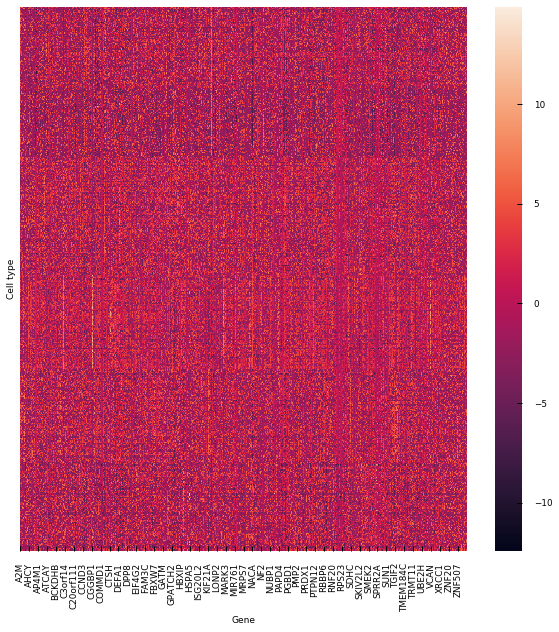

(5948, 430)
Counter({2: 1790, 3: 1749, 4: 920, 0: 815, 1: 674})


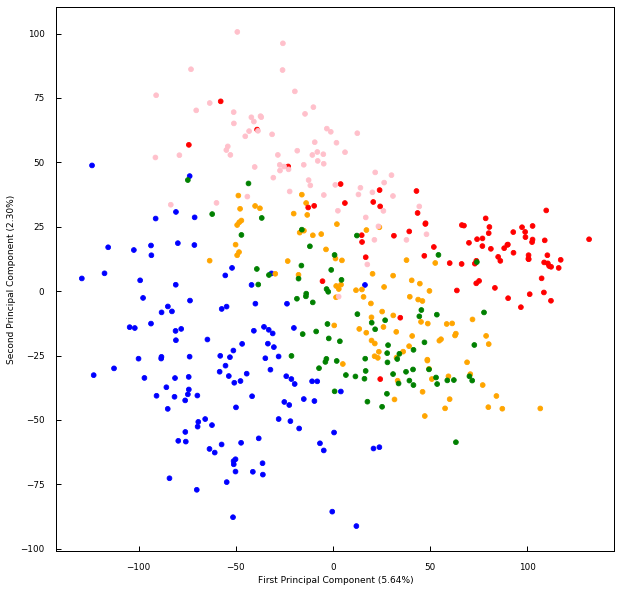

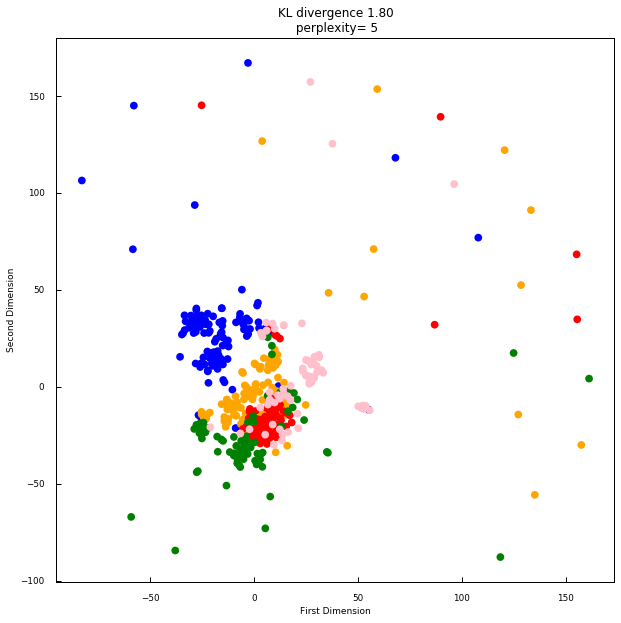

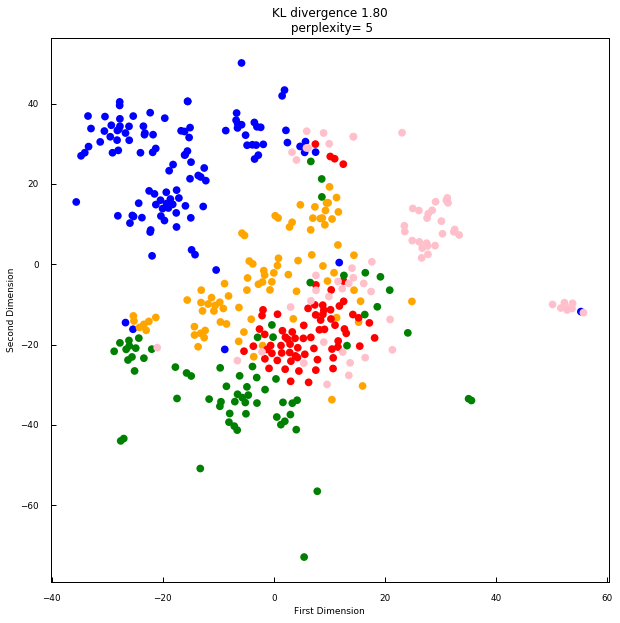

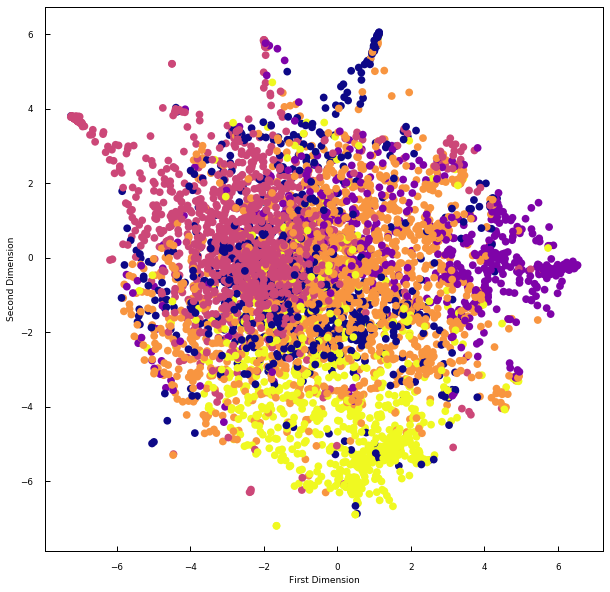

In [580]:
df = pd.read_csv('../data/Patel.csv',sep=',', header=0)

df = df.set_index(df.iloc[:,0], inplace=False)
df = df.iloc[:,1:]

X = df.T

print(X.shape)

patients = list(map(lambda s: s[0:5],df.columns)) #take first 5 letter for patient id

color_dict={'MGH26':'blue', 'MGH28':'orange', 'MGH29': 'red', 'MGH30': 'green', 'MGH31': 'pink'}
colors=[color_dict[p] for p in patients]


plt.figure(figsize=(10,10))
ax = sns.heatmap(X, yticklabels=False)
plt.ylabel("Cell type")
plt.xlabel("Gene")
plt.show(block=False)

pca = PCA() #create a PCA object

pca.fit(X)
x_pca = pca.transform(X)

var_explained=pca.explained_variance_ratio_

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=colors)
plt.xlabel('First Principal Component ({0:.2f}%)'.format(var_explained[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(var_explained[1]*100))

tsne=TSNE(n_components=2,perplexity=5).fit(X)#create the T-SNE object and fit the data
X_embedded = tsne.embedding_#project the data to the new manifold using the fitted function found before

plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, s=60, lw=0)
plt.title('KL divergence {0:.2f}\n perplexity= {1}'.format(tsne.kl_divergence_,5),fontsize=12)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

dbscan = cluster.DBSCAN(eps=20, min_samples=5)
dbscan.fit_predict(X_embedded[:, 0:2])

plt.figure(figsize=(10,10))
idx = np.where(dbscan.labels_>=0)[0]
plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=[colors[i] for i in idx], s=60, lw=0)
plt.title('KL divergence {0:.2f}\n perplexity= {1}'.format(tsne.kl_divergence_,5),fontsize=12)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')


X = X.T

print(X.shape)

kmeans = cluster.KMeans(5)
kmeans.fit(X)
cl_labels = kmeans.labels_

print(Counter(cl_labels))

tsne=TSNE(n_components=2,perplexity=15).fit(X)#create the T-SNE object and fit the data
X_embedded = tsne.embedding_#project the data to the new manifold using the fitted function found before

dbscan = cluster.DBSCAN(eps=2, min_samples=5)
dbscan.fit_predict(X_embedded[:, 0:2])

plt.figure(figsize=(10,10))
idx = np.where(dbscan.labels_>=0)[0]
plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=[cl_labels[i]  for i in idx], s=60, lw=0, cmap='plasma')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

plt.show()



#Next cell is correction!So work above!

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#




#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#


#